#### **Christopher Oates** ####
#### **NR491 Fall 2022** *Final Project* ####

# Creating a Story Map Using Leaflet and CSVs

---

**Objectives:**

By the end of this exericse, you should be able to:

* Create an HTML page
* Host an interactive map (Leaflet) on GitHub Pages
* Create a storymap using Python, Leaflet, and CSV files

---

In this exercise, you will learn how to present spatial data in an interactive narrative similar to [ESRI StoryMaps](https://storymaps-classic.arcgis.com/en/gallery/#s=0) using open source products. You will learn how to host a live version of an HTML webpage on GitHub Pages.

<!-- If you double-click on the `raleigh.html` file in your folder, a map will open in your web browser. Next, let's open the `raleigh.html` file in **VS Code**. -->

This code is adapted from the `index.html` file from [this GitHub repository](https://github.com/HandsOnDataViz/leaflet-map-simple).

This exercise is an adaptation of the ["Leaflet Storymaps with Google Sheets" tutorial](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html) from the *Hands-On Data Visualization* book by Jack Dougherty & Ilya Ilyankou. The open-acess web edition of the book can be found [here](https://handsondataviz.org/).

Dougherty and Ilyankou developed Leaflet Storymaps with Google Sheets to create an open-source, easily migratable, story map tool. In this exercise, we are adapting their work with Google Sheets into using Python to create and edit CSVs to create the open-source storymap.

### Host a Live Leaflet Map on GitHub Pages

In order to host your storymap on the internet, you need to create a GitHub repository for this project. The best way to do this is to **fork** the leaflet-storymap-nr491 repo from [this repo](https://github.com/mdgaines/leaflet-storymap-nr491) on my (Mollie Gaines') GitHub.

Go to Settings > Pages and set Branch to `main` and save.

Edit your README.md to have the link to your new repo.

### Leaflet Storymap with CSVs

We are now going to start working on our Leaflet Storymap by building several `pandas dataframes` which we can save as a CSVs.

Our storymap will have a scrolling narrative that follows points along our map. You will learn how to add images, audio and video files, and different map backgrounds. 

We will build an in-class storymap to looking at different colleges and universities in Wake County.

In [150]:
import pandas as pd
import geopandas as gpd
import os
import folium
import csv

In [151]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
import fiona

In [152]:
import os
import rasterio as rio
import rioxarray as rxr
import geopandas as gpd
import numpy as np
import pandas as pd
import folium
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import matplotlib.patches as mpatches
import random

In [153]:
wakeun = gpd.read_file('./data/Census_Tracts_2020.zip')
wakeun.head()

OBJECTID STATEFP COUNTYFP TRACTCE        GEOID    NAME  \
0         1      37      183  052704  37183052704  527.04   
1         2      37      183  053432  37183053432  534.32   
2         3      37      183  053435  37183053435  534.35   
3         4      37      183  054224  37183054224  542.24   
4         5      37      183  054223  37183054223  542.23   

              NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  POPULATION HOUSING_UN  \
0  Census Tract 527.04  G5020        S   2922352  ...        6809       2758   
1  Census Tract 534.32  G5020        S  17659472  ...        3173       1207   
2  Census Tract 534.35  G5020        S   3026312  ...        3741       1893   
3  Census Tract 542.24  G5020        S   4097266  ...        4651       1903   
4  Census Tract 542.23  G5020        S   3765544  ...        2723       1195   

  OCCUPIED_U  VACANT_UNI GROUP_QUAR OCCUPANCY_ VACANCY_RA    Shape__Are  \
0       2608         150         15  94.561276   5.438724  3.178422e+07   
1       1135          72          0  94.034797   5.965203  1.900465e+08   
2       1490         403          0  78.711041  21.288959  3.256894e+07   
3       1778         125        163  93.431424   6.568576  4.575283e+07   
4       1015         180        252  84.937238  15.062762  4.052823e+07   

     Shape__Len                                           geometry  
0  25315.743349  POLYGON ((2116807.233 759035.938, 2116815.350 ...  
1  65443.500140  POLYGON ((2032195.804 704805.331, 2032197.144 ...  
2  28849.183289  POLYGON ((2046868.882 723521.531, 2046920.100 ...  
3  32473.609814  POLYGON ((2143276.912 807022.490, 2143301.992 ...  
4  28087.654280  POLYGON ((2146110.016 813703.902, 2146164.765 ...  

[5 rows x 32 columns]

In [154]:
wakeun.crs

<Derived Projected CRS: EPSG:2264>
Name: NAD83 / North Carolina (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - North Carolina - counties of Alamance; Alexander; Alleghany; Anson; Ashe; Avery; Beaufort; Bertie; Bladen; Brunswick; Buncombe; Burke; Cabarrus; Caldwell; Camden; Carteret; Caswell; Catawba; Chatham; Cherokee; Chowan; Clay; Cleveland; Columbus; Craven; Cumberland; Currituck; Dare; Davidson; Davie; Duplin; Durham; Edgecombe; Forsyth; Franklin; Gaston; Gates; Graham; Granville; Greene; Guilford; Halifax; Harnett; Haywood; Henderson; Hertford; Hoke; Hyde; Iredell; Jackson; Johnston; Jones; Lee; Lenoir; Lincoln; Macon; Madison; Martin; McDowell; Mecklenburg; Mitchell; Montgomery; Moore; Nash; New Hanover; Northampton; Onslow; Orange; Pamlico; Pasquotank; Pender; Perquimans; Person; Pitt; Polk; Randolph; Richmond; Robeson; Rockingham; Rowan; Rutherford; Sampson; Scotland; Stanly; Sto

In [155]:
wake =wakeun.to_crs('epsg:4269')
wake.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [156]:
blhopath = "./data/ACS_HomeownershipbyRace_Tract - Copy.csv"
blho = pd.read_csv(blhopath)

In [157]:
blho.loc[:,"NAME"]=[n.replace('Census Tract ','').upper()for n in blho.NAME.to_list()]
blho

GISJOIN       YEAR               GEOID    GEOIDTX11    NAME  \
0    G3701830050100  2016-2020  14000US37183050100  37183050100     501   
1    G3701830050300  2016-2020  14000US37183050300  37183050300     503   
2    G3701830050400  2016-2020  14000US37183050400  37183050400     504   
3    G3701830050500  2016-2020  14000US37183050500  37183050500     505   
4    G3701830050600  2016-2020  14000US37183050600  37183050600     506   
..              ...        ...                 ...          ...     ...   
225  G3701830054404  2016-2020  14000US37183054404  37183054404  544.04   
226  G3701830054501  2016-2020  14000US37183054501  37183054501  545.01   
227  G3701830054502  2016-2020  14000US37183054502  37183054502  545.02   
228  G3701830980100  2016-2020  14000US37183980100  37183980100    9801   
229  G3701830980200  2016-2020  14000US37183980200  37183980200    9802   

     Total  Towner  Trenter  TWhite  Wowner  Wrenter  Tblack  BOwner  Brenter  
0     2326     511     1815    1739     511     1228     223       0      223  
1     2288     753     1535    1963     729     1234     153      24      129  
2      878     470      408     704     461      243     123       0      123  
3     2038    1533      505    1695    1307      388     250     172       78  
4     1045     476      569     452     313      139     546     146      400  
..     ...     ...      ...     ...     ...      ...     ...     ...      ...  
225   2585    1824      761    1493    1100      393     594     276      318  
226   2640    1153     1487    1605     928      677     599     139      460  
227   1312     488      824     730     370      360     395      98      297  
228      0       0        0       0       0        0       0       0        0  
229      0       0        0       0       0        0       0       0        0  

[230 rows x 14 columns]

In [158]:
merge1=wake.merge(blho, how='inner',on='NAME' )
merge1

OBJECTID STATEFP COUNTYFP TRACTCE      GEOID_x    NAME  \
0           1      37      183  052704  37183052704  527.04   
1           2      37      183  053432  37183053432  534.32   
2           3      37      183  053435  37183053435  534.35   
3           4      37      183  054224  37183054224  542.24   
4           5      37      183  054223  37183054223  542.23   
..        ...     ...      ...     ...          ...     ...   
225       226      37      183  054015  37183054015  540.15   
226       227      37      183  053604  37183053604  536.04   
227       228      37      183  053806  37183053806  538.06   
228       229      37      183  052809  37183052809  528.09   
229       230      37      183  053517  37183053517  535.17   

                NAMELSAD  MTFCC FUNCSTAT     ALAND  ...    GEOIDTX11 Total  \
0    Census Tract 527.04  G5020        S   2922352  ...  37183052704  2343   
1    Census Tract 534.32  G5020        S  17659472  ...  37183053432   786   
2    Census Tract 534.35  G5020        S   3026312  ...  37183053435  1703   
3    Census Tract 542.24  G5020        S   4097266  ...  37183054224  1585   
4    Census Tract 542.23  G5020        S   3765544  ...  37183054223  1131   
..                   ...    ...      ...       ...  ...          ...   ...   
225  Census Tract 540.15  G5020        S   4787879  ...  37183054015  1661   
226  Census Tract 536.04  G5020        S   3229810  ...  37183053604  1606   
227  Census Tract 538.06  G5020        S  10444281  ...  37183053806  1057   
228  Census Tract 528.09  G5020        S  17738404  ...  37183052809   876   
229  Census Tract 535.17  G5020        S   4088093  ...  37183053517  1614   

    Towner  Trenter TWhite Wowner Wrenter Tblack BOwner Brenter  
0      611     1732    538    257     281   1260    264     996  
1      739       47    673    630      43    113    109       4  
2      885      818   1436    659     777      0      0       0  
3     1038      547   1029    831     198    470    179     291  
4      614      517    864    465     399    229    135      94  
..     ...      ...    ...    ...     ...    ...    ...     ...  
225    568     1093    839    319     520    500    164     336  
226   1433      173    919    826      93     95     89       6  
227   1049        8    996    988       8     22     22       0  
228    682      194    643    529     114    175    126      49  
229    986      628    963    657     306    295     89     206  

[230 rows x 45 columns]

Text(411.72995453081876, 0.5, 'Degrees Latitude')

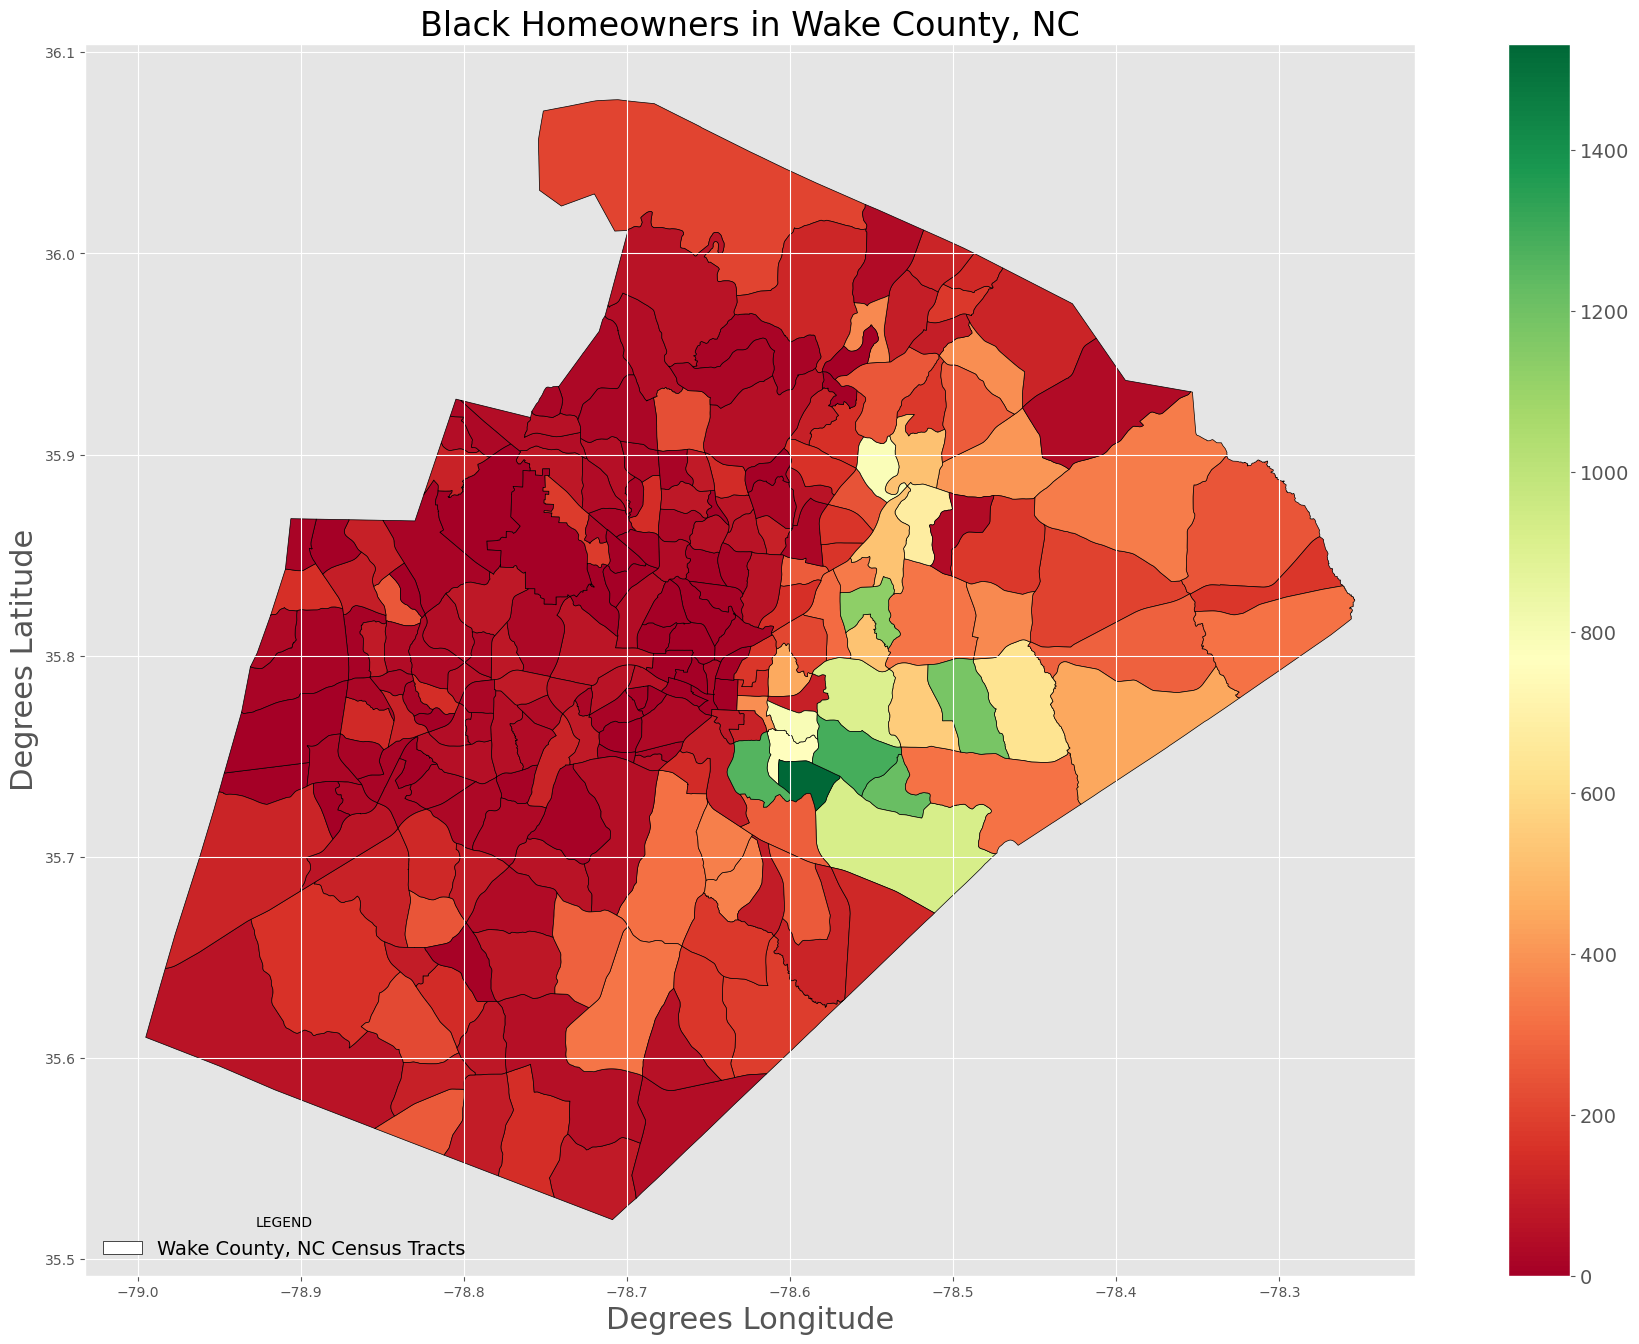

In [159]:
fig, ax=plt.subplots(figsize=(24,16),frameon=True)               

handles, labels = fig.gca().get_legend_handles_labels()

p= Polygon(np.random.rand(3, 2), True, facecolor="White", 
                   edgecolor='black', zorder=1)
handles.append(p)  
labels.append('Wake County, NC Census Tracts') 

ax.legend(handles=handles, labels=labels,
          fontsize=14,
          frameon=False, edgecolor='black',
          loc=('lower left'),
          title="LEGEND")

merge1.plot(ax=ax,column='BOwner',figsize=(24,16),cmap='RdYlGn',
edgecolor='k',zorder=.5,legend=True)

ax.set_title("Black Homeowners in Wake County, NC",fontsize=24)

ax = ax.plot(column='BOwner', cmap='RdYlGn', legend=True)

cb_ax = fig.axes[1] 

cb_ax.tick_params(labelsize=14)

plt.xlabel('Degrees Longitude', fontsize=22)
plt.ylabel('Degrees Latitude', fontsize=22)

In [160]:
income = pd.read_csv('./data/ACS_Income_By_Tenure_2016_2020.csv')

In [161]:
income.loc[:,"NAME"]=[n.replace('Census Tract ', '').upper()for n in income.NAME.to_list()]
income

GEOIDTX11         GISJOIN       YEAR     NAME  Tot_Income     Owner  \
0    37183050100  G3701830050100  2016-2020     501     104231.0  143750.0   
1    37183050300  G3701830050300  2016-2020     503      75345.0  135163.0   
2    37183050400  G3701830050400  2016-2020     504      92391.0  137500.0   
3    37183050500  G3701830050500  2016-2020     505      87568.0  106784.0   
4    37183050600  G3701830050600  2016-2020     506      50655.0   80577.0   
..           ...             ...        ...      ...         ...       ...   
225  37183054404  G3701830054404  2016-2020  544.04      59994.0   70667.0   
226  37183054501  G3701830054501  2016-2020  545.01      49716.0  115284.0   
227  37183054502  G3701830054502  2016-2020  545.02      40688.0   62283.0   
228  37183980100  G3701830980100  2016-2020    9801          NaN       NaN   
229  37183980200  G3701830980200  2016-2020    9802          NaN       NaN   

      Renter  
0    89350.0  
1    57721.0  
2    44044.0  
3    43606.0  
4    30893.0  
..       ...  
225  40092.0  
226  23837.0  
227  38663.0  
228      NaN  
229      NaN  

[230 rows x 7 columns]

In [162]:
wakewdata = merge1.merge(income, how='inner', on='GEOIDTX11')
wakewdata

OBJECTID STATEFP COUNTYFP TRACTCE      GEOID_x  NAME_x  \
0           1      37      183  052704  37183052704  527.04   
1           2      37      183  053432  37183053432  534.32   
2           3      37      183  053435  37183053435  534.35   
3           4      37      183  054224  37183054224  542.24   
4           5      37      183  054223  37183054223  542.23   
..        ...     ...      ...     ...          ...     ...   
225       226      37      183  054015  37183054015  540.15   
226       227      37      183  053604  37183053604  536.04   
227       228      37      183  053806  37183053806  538.06   
228       229      37      183  052809  37183052809  528.09   
229       230      37      183  053517  37183053517  535.17   

                NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  Wrenter Tblack  \
0    Census Tract 527.04  G5020        S   2922352  ...      281   1260   
1    Census Tract 534.32  G5020        S  17659472  ...       43    113   
2    Census Tract 534.35  G5020        S   3026312  ...      777      0   
3    Census Tract 542.24  G5020        S   4097266  ...      198    470   
4    Census Tract 542.23  G5020        S   3765544  ...      399    229   
..                   ...    ...      ...       ...  ...      ...    ...   
225  Census Tract 540.15  G5020        S   4787879  ...      520    500   
226  Census Tract 536.04  G5020        S   3229810  ...       93     95   
227  Census Tract 538.06  G5020        S  10444281  ...        8     22   
228  Census Tract 528.09  G5020        S  17738404  ...      114    175   
229  Census Tract 535.17  G5020        S   4088093  ...      306    295   

    BOwner  Brenter       GISJOIN_y     YEAR_y   NAME_y Tot_Income     Owner  \
0      264      996  G3701830052704  2016-2020  527.04     40926.0   60060.0   
1      109        4  G3701830053432  2016-2020  534.32    100676.0  101098.0   
2        0        0  G3701830053435  2016-2020  534.35    103610.0  136648.0   
3      179      291  G3701830054224  2016-2020  542.24     57784.0   75066.0   
4      135       94  G3701830054223  2016-2020  542.23     48125.0  109113.0   
..     ...      ...             ...        ...      ...        ...       ...   
225    164      336  G3701830054015  2016-2020  540.15     55208.0   66250.0   
226     89        6  G3701830053604  2016-2020  536.04    171250.0  176205.0   
227     22        0  G3701830053806  2016-2020  538.06    129449.0  129568.0   
228    126       49  G3701830052809  2016-2020  528.09     71333.0   76959.0   
229     89      206  G3701830053517  2016-2020  535.17     64415.0   70833.0   

       Renter  
0     36039.0  
1         NaN  
2     93949.0  
3     36776.0  
4     45625.0  
..        ...  
225   43052.0  
226  144375.0  
227       NaN  
228   55735.0  
229   61630.0  

[230 rows x 51 columns]

In [163]:
wakewdata["Percent_Black_Homeowners"] = (wakewdata["BOwner"] / wakewdata["Towner"])
wakewdata

OBJECTID STATEFP COUNTYFP TRACTCE      GEOID_x  NAME_x  \
0           1      37      183  052704  37183052704  527.04   
1           2      37      183  053432  37183053432  534.32   
2           3      37      183  053435  37183053435  534.35   
3           4      37      183  054224  37183054224  542.24   
4           5      37      183  054223  37183054223  542.23   
..        ...     ...      ...     ...          ...     ...   
225       226      37      183  054015  37183054015  540.15   
226       227      37      183  053604  37183053604  536.04   
227       228      37      183  053806  37183053806  538.06   
228       229      37      183  052809  37183052809  528.09   
229       230      37      183  053517  37183053517  535.17   

                NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  Tblack BOwner  \
0    Census Tract 527.04  G5020        S   2922352  ...    1260    264   
1    Census Tract 534.32  G5020        S  17659472  ...     113    109   
2    Census Tract 534.35  G5020        S   3026312  ...       0      0   
3    Census Tract 542.24  G5020        S   4097266  ...     470    179   
4    Census Tract 542.23  G5020        S   3765544  ...     229    135   
..                   ...    ...      ...       ...  ...     ...    ...   
225  Census Tract 540.15  G5020        S   4787879  ...     500    164   
226  Census Tract 536.04  G5020        S   3229810  ...      95     89   
227  Census Tract 538.06  G5020        S  10444281  ...      22     22   
228  Census Tract 528.09  G5020        S  17738404  ...     175    126   
229  Census Tract 535.17  G5020        S   4088093  ...     295     89   

    Brenter       GISJOIN_y     YEAR_y   NAME_y Tot_Income     Owner  \
0       996  G3701830052704  2016-2020  527.04     40926.0   60060.0   
1         4  G3701830053432  2016-2020  534.32    100676.0  101098.0   
2         0  G3701830053435  2016-2020  534.35    103610.0  136648.0   
3       291  G3701830054224  2016-2020  542.24     57784.0   75066.0   
4        94  G3701830054223  2016-2020  542.23     48125.0  109113.0   
..      ...             ...        ...      ...        ...       ...   
225     336  G3701830054015  2016-2020  540.15     55208.0   66250.0   
226       6  G3701830053604  2016-2020  536.04    171250.0  176205.0   
227       0  G3701830053806  2016-2020  538.06    129449.0  129568.0   
228      49  G3701830052809  2016-2020  528.09     71333.0   76959.0   
229     206  G3701830053517  2016-2020  535.17     64415.0   70833.0   

       Renter Percent_Black_Homeowners  
0     36039.0                 0.432079  
1         NaN                 0.147497  
2     93949.0                 0.000000  
3     36776.0                 0.172447  
4     45625.0                 0.219870  
..        ...                      ...  
225   43052.0                 0.288732  
226  144375.0                 0.062107  
227       NaN                 0.020972  
228   55735.0                 0.184751  
229   61630.0                 0.090264  

[230 rows x 52 columns]

Text(411.72995453081876, 0.5, 'Degrees Latitude')

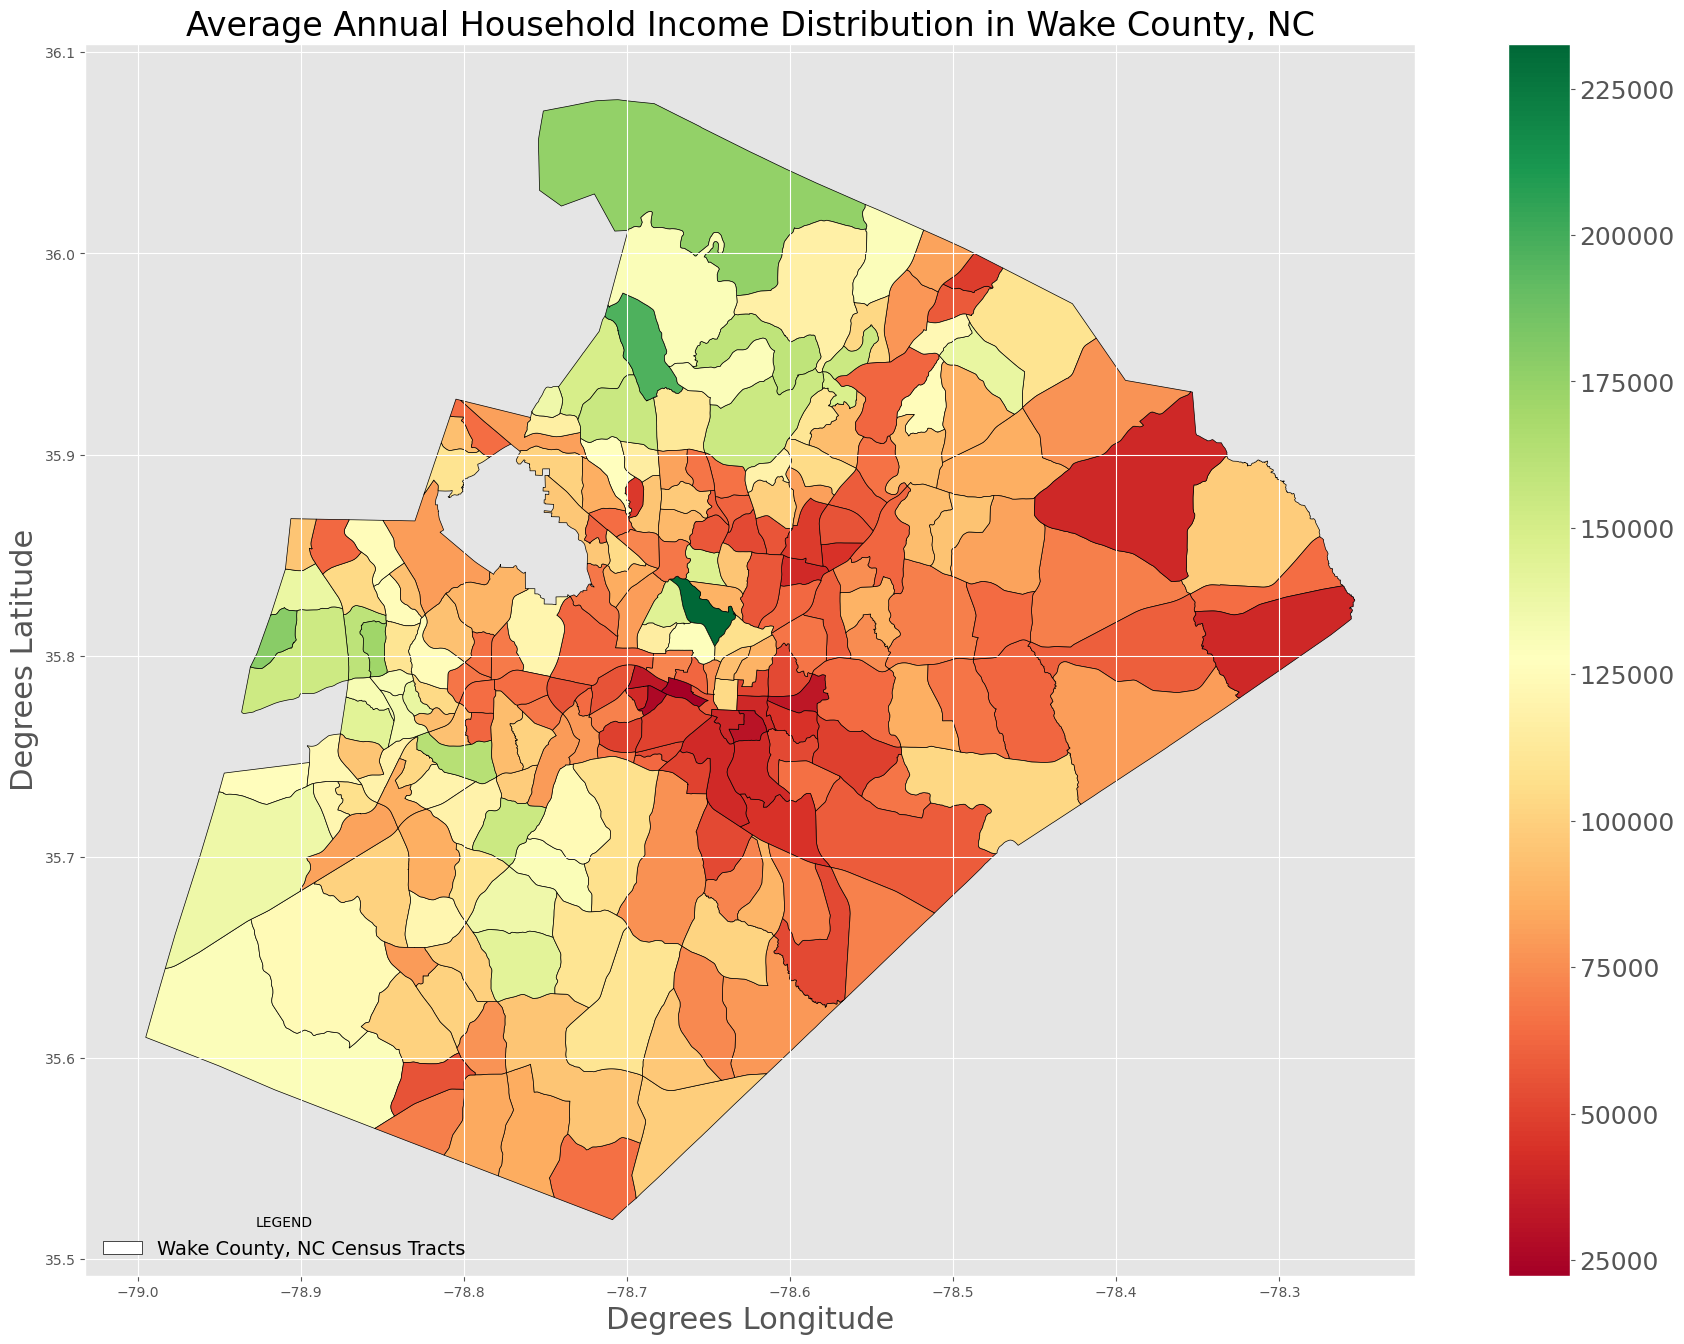

In [164]:
fig, ax=plt.subplots(figsize=(24,16),frameon=True)               

handles, labels = fig.gca().get_legend_handles_labels()

p= Polygon(np.random.rand(3, 2), True, facecolor="White", 
                   edgecolor='black', zorder=1)
handles.append(p)  
labels.append('Wake County, NC Census Tracts') 

ax.legend(handles=handles, labels=labels,
          fontsize=14,
          frameon=False, edgecolor='black',
          loc=('lower left'),
          title="LEGEND")

wakewdata.plot(ax=ax,column='Tot_Income',figsize=(24,16),cmap='RdYlGn',
edgecolor='k',zorder=.5,legend=True)

ax.set_title("Average Annual Household Income Distribution in Wake County, NC",fontsize=24)

ax = ax.plot(column='Tot_Income', cmap='RdYlGn', legend=True)

cb_ax = fig.axes[1] 

cb_ax.tick_params(labelsize=18)

plt.xlabel('Degrees Longitude', fontsize=22)
plt.ylabel('Degrees Latitude', fontsize=22)

Text(411.72995453081876, 0.5, 'Degrees Latitude')

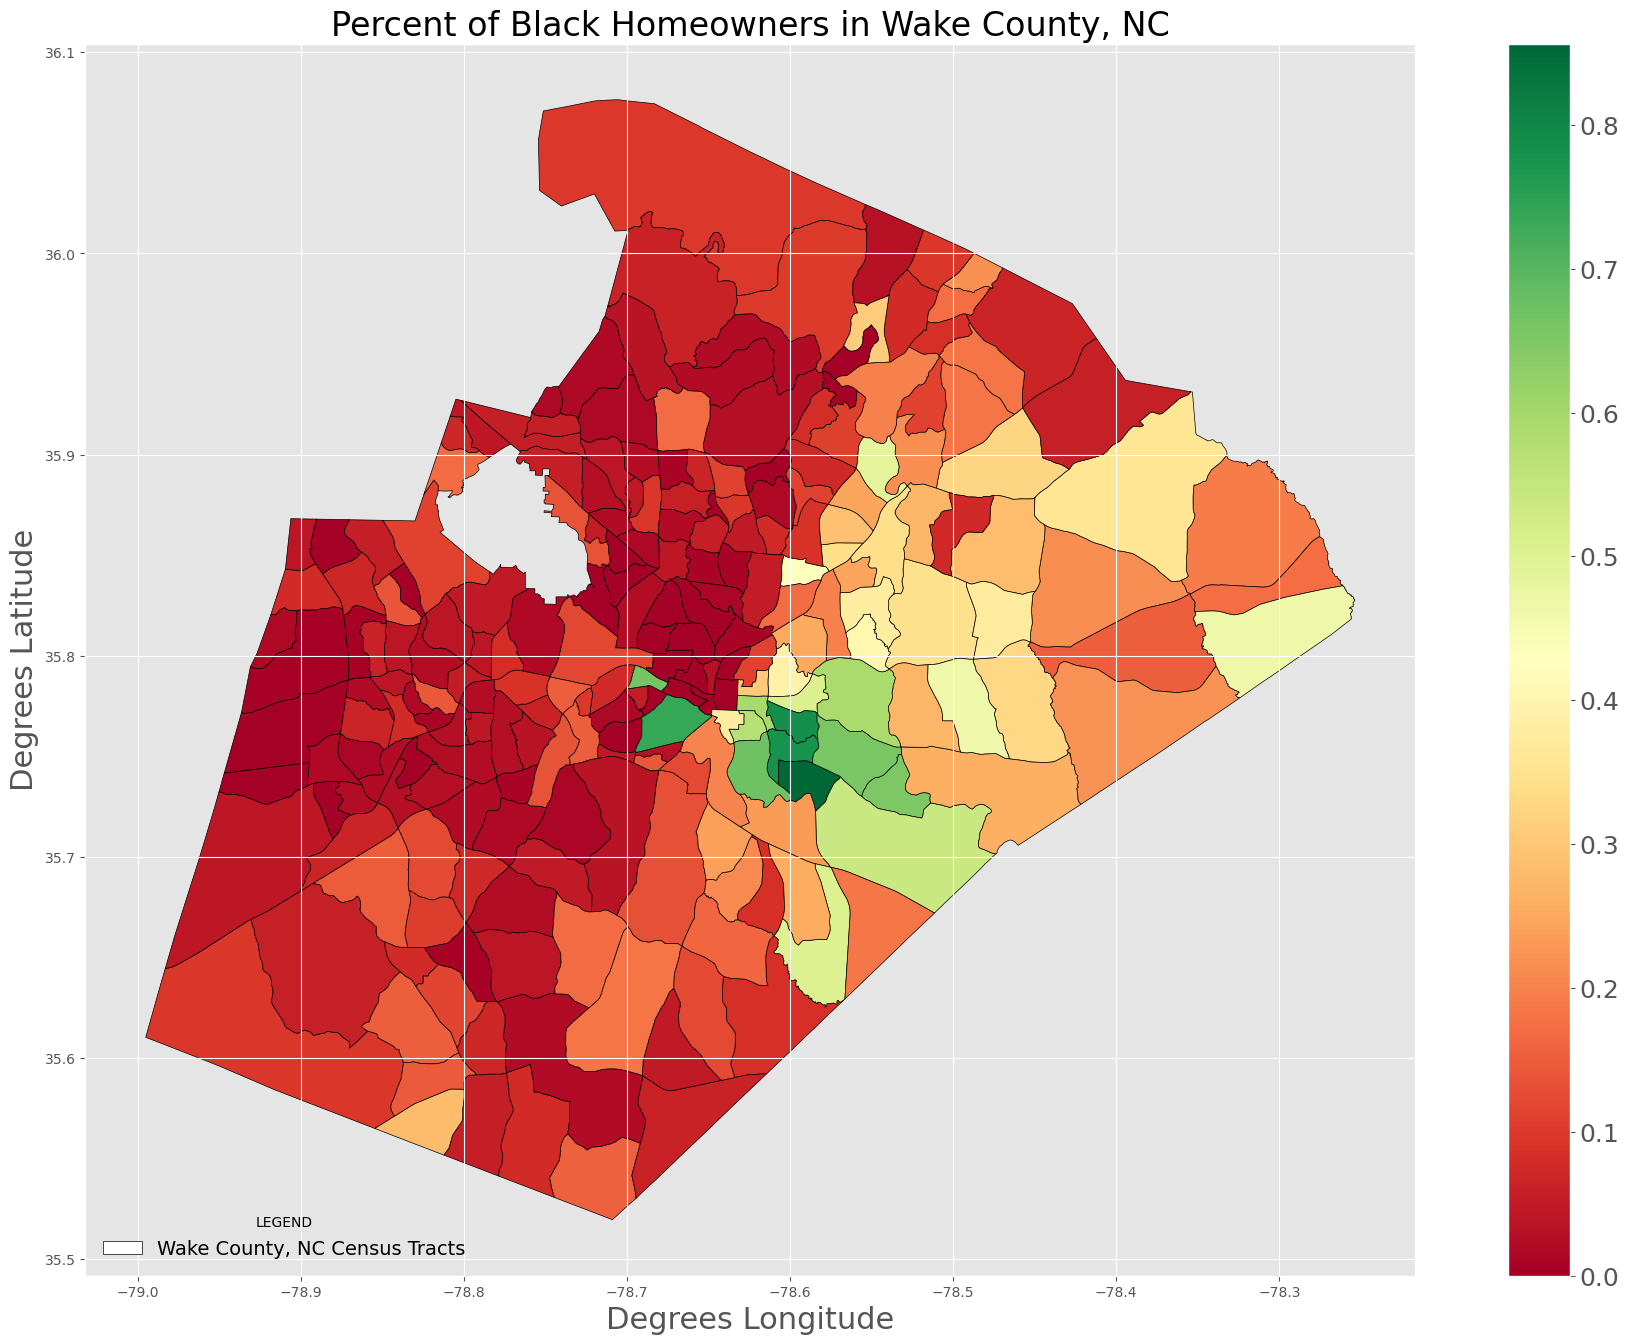

In [165]:
fig, ax=plt.subplots(figsize=(24,16),frameon=True)               

handles, labels = fig.gca().get_legend_handles_labels()

p= Polygon(np.random.rand(3, 2), True, facecolor="White", 
                   edgecolor='black', zorder=1)
handles.append(p)  
labels.append('Wake County, NC Census Tracts') 

ax.legend(handles=handles, labels=labels,
          fontsize=14,
          frameon=False, edgecolor='black',
          loc=('lower left'),
          title="LEGEND")

wakewdata.plot(ax=ax,column='Percent_Black_Homeowners',figsize=(24,16),cmap='RdYlGn',
edgecolor='k',zorder=.5,legend=True)

ax.set_title("Percent of Black Homeowners in Wake County, NC",fontsize=24)

ax = ax.plot(column='Percent_Black_Homeowners', cmap='RdYlGn', legend=True)

cb_ax = fig.axes[1] 

cb_ax.tick_params(labelsize=18)

plt.xlabel('Degrees Longitude', fontsize=22)
plt.ylabel('Degrees Latitude', fontsize=22)

In [166]:
nc_nlcd_path = './data/NLCD_2019_NC.tif'

In [167]:
with rio.open(nc_nlcd_path) as src:
    nlcd_data = src.read(1) 
    
    
    nlcd_meta = src.meta
    for key in nlcd_meta.keys():
        print(f'{key}: {nlcd_meta[key]}')
    
    nlcd_crs = src.crs 
    nlcd_res = src.res 
    nlcd_extent = src.bounds 
    nlcd_bands = src.count 
    nlcd_transform = src.transform 

    nlcd_colors = src.colormap(1) 
    print('nlcd_colors ', nlcd_colors)

    
    print(f'\n{src.meta}')

driver: GTiff
dtype: uint8
nodata: None
width: 26158
height: 11613
count: 1
crs: PROJCS["Albers Conical Equal Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
transform: | 30.00, 0.00, 1054155.00|
| 0.00,-30.00, 1690155.00|
| 0.00, 0.00, 1.00|
nlcd_colors  {0: (0, 0, 0, 255), 1: (0, 0, 0, 255), 2: (0, 0, 0, 255), 3: (0, 0, 0, 255), 4: (0, 0, 0, 255), 5: (0, 0, 0, 255), 6: (0, 0, 0, 255), 7: (0, 0, 0, 255), 8: (0, 0, 0, 255), 9: (0, 0, 0, 255), 10: (0, 0, 0, 255), 11: (70, 107

In [168]:
nlcd_data_rxr = rxr.open_rasterio(nc_nlcd_path)

nlcd_data_rxr

<xarray.DataArray (band: 1, y: 11613, x: 26158)>
[303772854 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 1.054e+06 1.054e+06 ... 1.839e+06 1.839e+06
  * y            (y) float64 1.69e+06 1.69e+06 1.69e+06 ... 1.342e+06 1.342e+06
    spatial_ref  int32 0
Attributes:
    LAYER_TYPE:           thematic
    OVERVIEWS_ALGORITHM:  IMAGINE Nearest Neighbor Resampling
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            Layer_1

In [169]:
print(f'CRS for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.crs}')
print(f'Resolution for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.resolution()}')
print(f'bounds for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.bounds()}')
print(f'Number of bands for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.count}')
print(f'Shape for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.shape}')
print(f'No data values for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.nodata}')
print(f'Transform for {os.path.basename(nc_nlcd_path)}: {nlcd_data_rxr.rio.transform()}')

CRS for NLCD_2019_NC.tif: PROJCS["Albers Conical Equal Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Resolution for NLCD_2019_NC.tif: (30.0, -30.0)
bounds for NLCD_2019_NC.tif: (1054155.0, 1341765.0, 1838895.0, 1690155.0)
Number of bands for NLCD_2019_NC.tif: 1
Shape for NLCD_2019_NC.tif: (11613, 26158)
No data values for NLCD_2019_NC.tif: None
Transform for NLCD_2019_NC.tif: | 30.00, 0.00, 1054155.00|
| 0.00,-30.00, 1690155.00|
| 0.00, 0.00, 1.00|


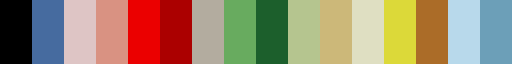

In [170]:
nlcd_colors2 = [[float(jj)/255.0 for jj in nlcd_colors[ii]] for ii in nlcd_colors] 
nlcd_classes_nc = np.unique(nlcd_data) 
r_cmap = []    

for ii in nlcd_classes_nc:
    r_cmap.append(nlcd_colors2[ii])
raster_cmap = ListedColormap(r_cmap) 
norm = mpl.colors.BoundaryNorm(nlcd_classes_nc-0.5, raster_cmap.N - 1) 

nlcd_classes = np.array([0,11,12,21,22,23,24,31,41,42,43,51,52,71,72,73,74,81,82,90,95])
nlcd_str = np.array(['NaN','Open Water','Perennial Ice/Snow','Developed, Open Space','Developed, Low Intensity',
           'Developed, Medium Intensity','Developed High Intensity','Barren Land (Rock/Sand/Clay)',
           'Deciduous Forest','Evergreen Forest','Mixed Forest','Dwarf Scrub','Shrub/Scrub',
           'Grassland/Herbaceous','Sedge/Herbaceous','Lichens','Moss','Pasture/Hay','Cultivated Crops',
           'Woody Wetlands','Emergent Herbaceous Wetlands'])

raster_cmap

In [171]:
nlcd_dict = dict(zip(nlcd_classes, nlcd_str))
print(nlcd_dict)

nc_nlcd_str = [nlcd_dict[i] for i in nlcd_classes_nc]
nc_nlcd_str

{0: 'NaN', 11: 'Open Water', 12: 'Perennial Ice/Snow', 21: 'Developed, Open Space', 22: 'Developed, Low Intensity', 23: 'Developed, Medium Intensity', 24: 'Developed High Intensity', 31: 'Barren Land (Rock/Sand/Clay)', 41: 'Deciduous Forest', 42: 'Evergreen Forest', 43: 'Mixed Forest', 51: 'Dwarf Scrub', 52: 'Shrub/Scrub', 71: 'Grassland/Herbaceous', 72: 'Sedge/Herbaceous', 73: 'Lichens', 74: 'Moss', 81: 'Pasture/Hay', 82: 'Cultivated Crops', 90: 'Woody Wetlands', 95: 'Emergent Herbaceous Wetlands'}


['NaN',
 'Open Water',
 'Developed, Open Space',
 'Developed, Low Intensity',
 'Developed, Medium Intensity',
 'Developed High Intensity',
 'Barren Land (Rock/Sand/Clay)',
 'Deciduous Forest',
 'Evergreen Forest',
 'Mixed Forest',
 'Shrub/Scrub',
 'Grassland/Herbaceous',
 'Pasture/Hay',
 'Cultivated Crops',
 'Woody Wetlands',
 'Emergent Herbaceous Wetlands']

In [172]:
patches = [ mpatches.Patch(color=r_cmap[i], label="{l}".format(l=nc_nlcd_str[i]) ) for i in range(len(nc_nlcd_str)) ]

In [173]:
nlcd_data_rxr.rio.crs

CRS.from_wkt('PROJCS["Albers Conical Equal Area",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [174]:
nlcd_rxr= rxr.open_rasterio(nc_nlcd_path, masked = False).squeeze()
nlcd_rxr

<xarray.DataArray (y: 11613, x: 26158)>
[303772854 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 1.054e+06 1.054e+06 ... 1.839e+06 1.839e+06
  * y            (y) float64 1.69e+06 1.69e+06 1.69e+06 ... 1.342e+06 1.342e+06
    spatial_ref  int32 0
Attributes:
    LAYER_TYPE:           thematic
    OVERVIEWS_ALGORITHM:  IMAGINE Nearest Neighbor Resampling
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            Layer_1

In [175]:
nlcd_rxr= rxr.open_rasterio(nc_nlcd_path, masked = False).squeeze()

nlcd_rxr

<xarray.DataArray (y: 11613, x: 26158)>
[303772854 values with dtype=uint8]
Coordinates:
    band         int32 1
  * x            (x) float64 1.054e+06 1.054e+06 ... 1.839e+06 1.839e+06
  * y            (y) float64 1.69e+06 1.69e+06 1.69e+06 ... 1.342e+06 1.342e+06
    spatial_ref  int32 0
Attributes:
    LAYER_TYPE:           thematic
    OVERVIEWS_ALGORITHM:  IMAGINE Nearest Neighbor Resampling
    scale_factor:         1.0
    add_offset:           0.0
    long_name:            Layer_1

In [176]:
nlcd_rxr2=nlcd_rxr.rio.write_nodata(0, inplace=True)

In [177]:
wgs84_nlcd = nlcd_rxr2.rio.reproject(wakewdata.crs)
print(f'raster CRS: {wgs84_nlcd.rio.crs}')

raster CRS: EPSG:4269


In [178]:
nlcd_clip = wgs84_nlcd.rio.clip(wake.geometry, wakewdata.crs)

In [179]:
nlcd_clip_path = './data/Output/nlcd_cliped.tif'

In [180]:
nlcd_clip_data_rxr=rxr.open_rasterio(nlcd_clip_path)
nlcd_clip_data_rxr

<xarray.DataArray (band: 1, y: 1767, x: 2352)>
[4155984 values with dtype=uint8]
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -78.99 -78.99 -78.99 ... -78.25 -78.25 -78.25
  * y            (y) float64 36.08 36.08 36.08 36.08 ... 35.52 35.52 35.52 35.52
    spatial_ref  int32 0
Attributes:
    _FillValue:    0.0
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     Layer_1

Text(253.72222222222223, 0.5, 'Degrees Latitude')

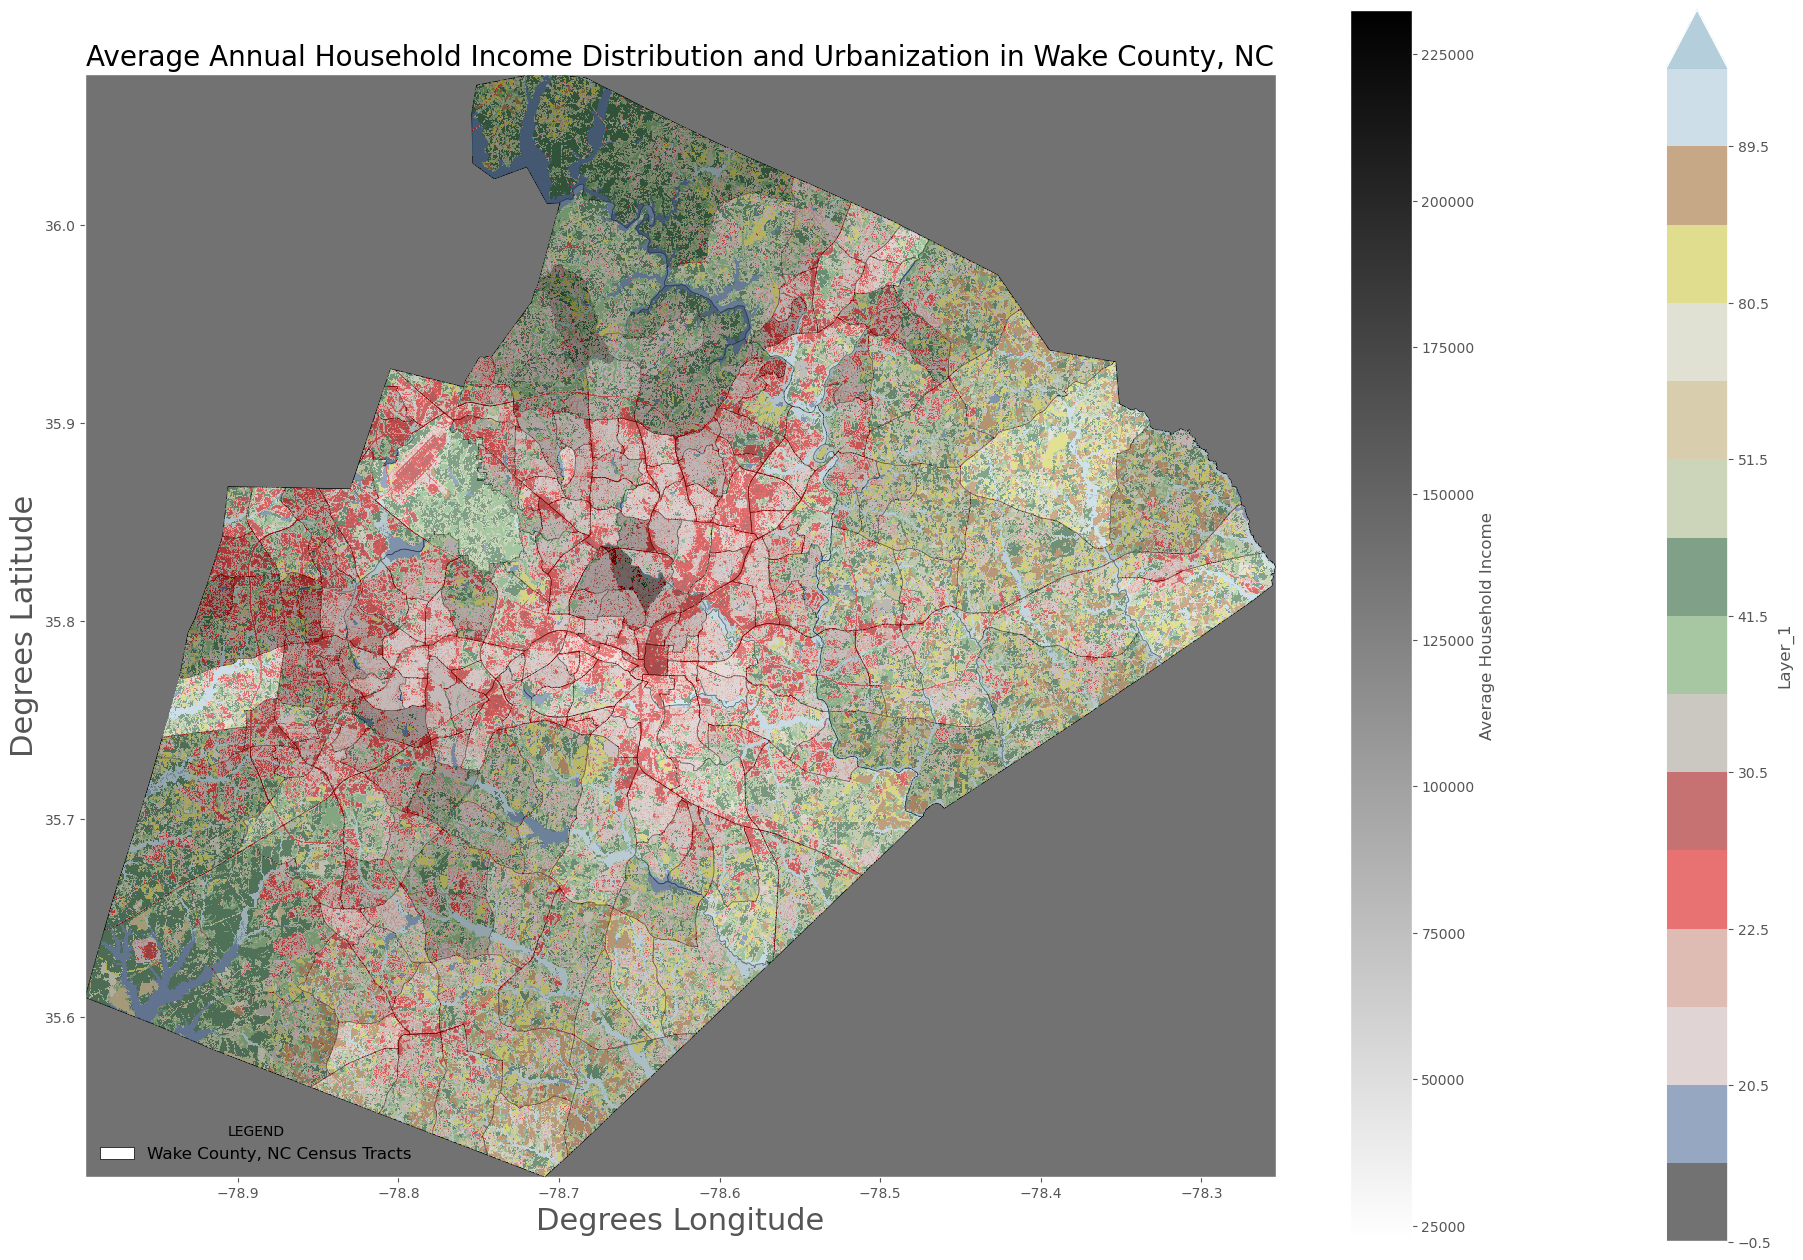

In [181]:
fig, ax = plt.subplots(figsize=(24, 16))
nlcd_clip.plot(ax=ax, cmap=raster_cmap, norm=norm, alpha = .5)
wakewdata.plot(ax=ax, column='Tot_Income',figsize=(24,16),cmap='gray_r',
edgecolor='k',zorder=.5,legend=True, alpha = 1,
legend_kwds= {'label': "Average Household Income"})
ax.set_title("Average Annual Household Income Distribution and Urbanization in Wake County, NC", fontdict = {'fontsize': '20', 'fontweight' : '3'})
ax.legend(handles=handles, labels=labels,
          fontsize=12,
          frameon=False, edgecolor='black',
          loc=('lower left'),
          title="LEGEND")
plt.xlabel('Degrees Longitude', fontsize=22)
plt.ylabel('Degrees Latitude', fontsize=22)

Text(253.72222222222223, 0.5, 'Degrees Latitude')

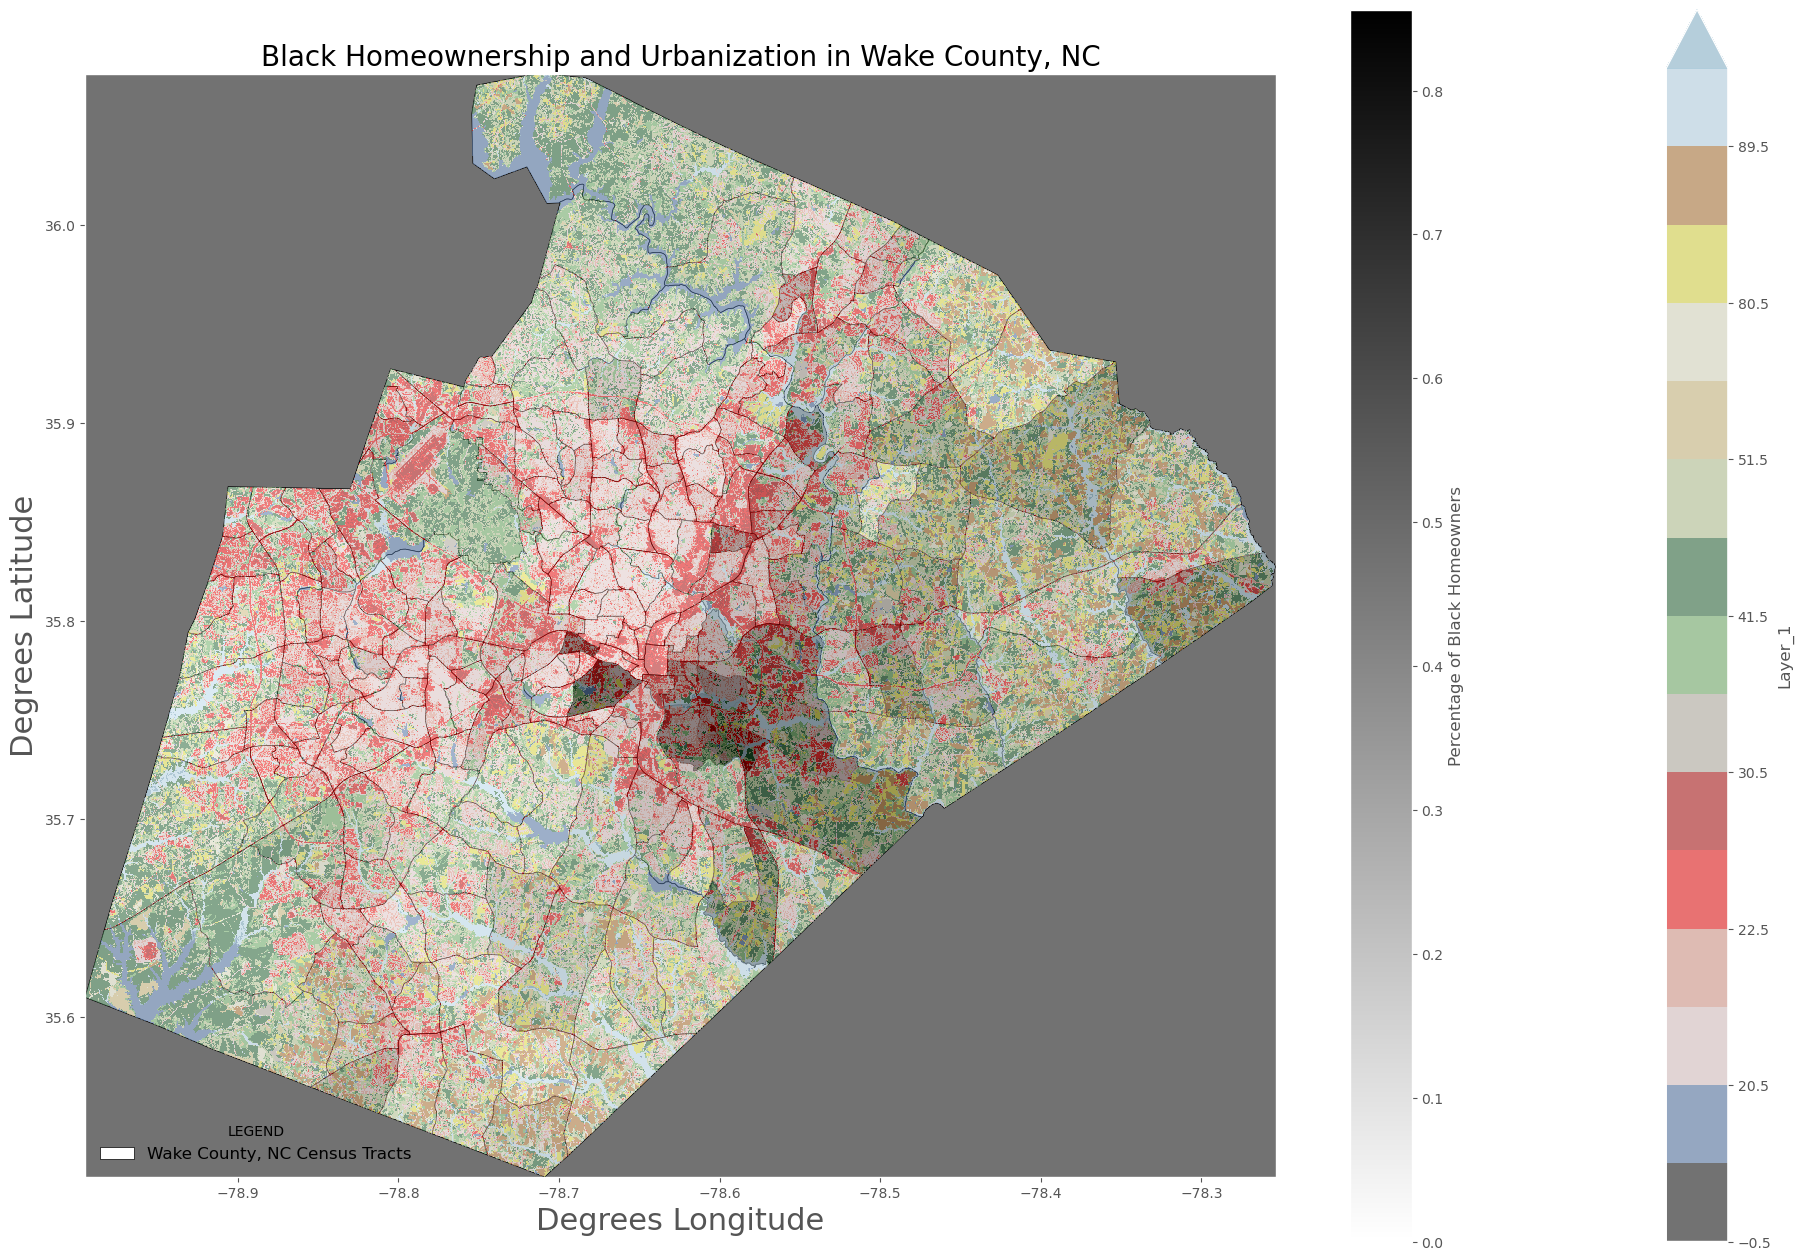

In [182]:
fig, ax = plt.subplots(figsize=(24, 16))
nlcd_clip.plot(ax=ax, cmap=raster_cmap, norm=norm, alpha = .5)
wakewdata.plot(ax=ax, column='Percent_Black_Homeowners',figsize=(24,16),cmap='gray_r',
edgecolor='k',zorder=.5,legend=True, alpha = 1,
legend_kwds= {'label': "Percentage of Black Homeowners"})
ax.set_title("Black Homeownership and Urbanization in Wake County, NC", fontdict = {'fontsize': '20', 'fontweight' : '3'})
ax.legend(handles=handles, labels=labels,
          fontsize=12,
          frameon=False, edgecolor='black',
          loc=('lower left'),
          title="LEGEND")

plt.xlabel('Degrees Longitude', fontsize=22)
plt.ylabel('Degrees Latitude', fontsize=22)

In [183]:
totalincome=wakewdata.loc[:, wakewdata.columns == 'Tot_Income']
totalincome.head()

Tot_Income
0     40926.0
1    100676.0
2    103610.0
3     57784.0
4     48125.0

In [184]:
blackhomeownerp=wakewdata.loc[:, wakewdata.columns == 'Percent_Black_Homeowners']
blackhomeownerp.head()

Percent_Black_Homeowners
0                  0.432079
1                  0.147497
2                  0.000000
3                  0.172447
4                  0.219870

In [185]:
corr1=(totalincome['Tot_Income'].corr
(blackhomeownerp['Percent_Black_Homeowners']))
print(corr1)

-0.4716462947941303


<function matplotlib.pyplot.show(close=None, block=None)>

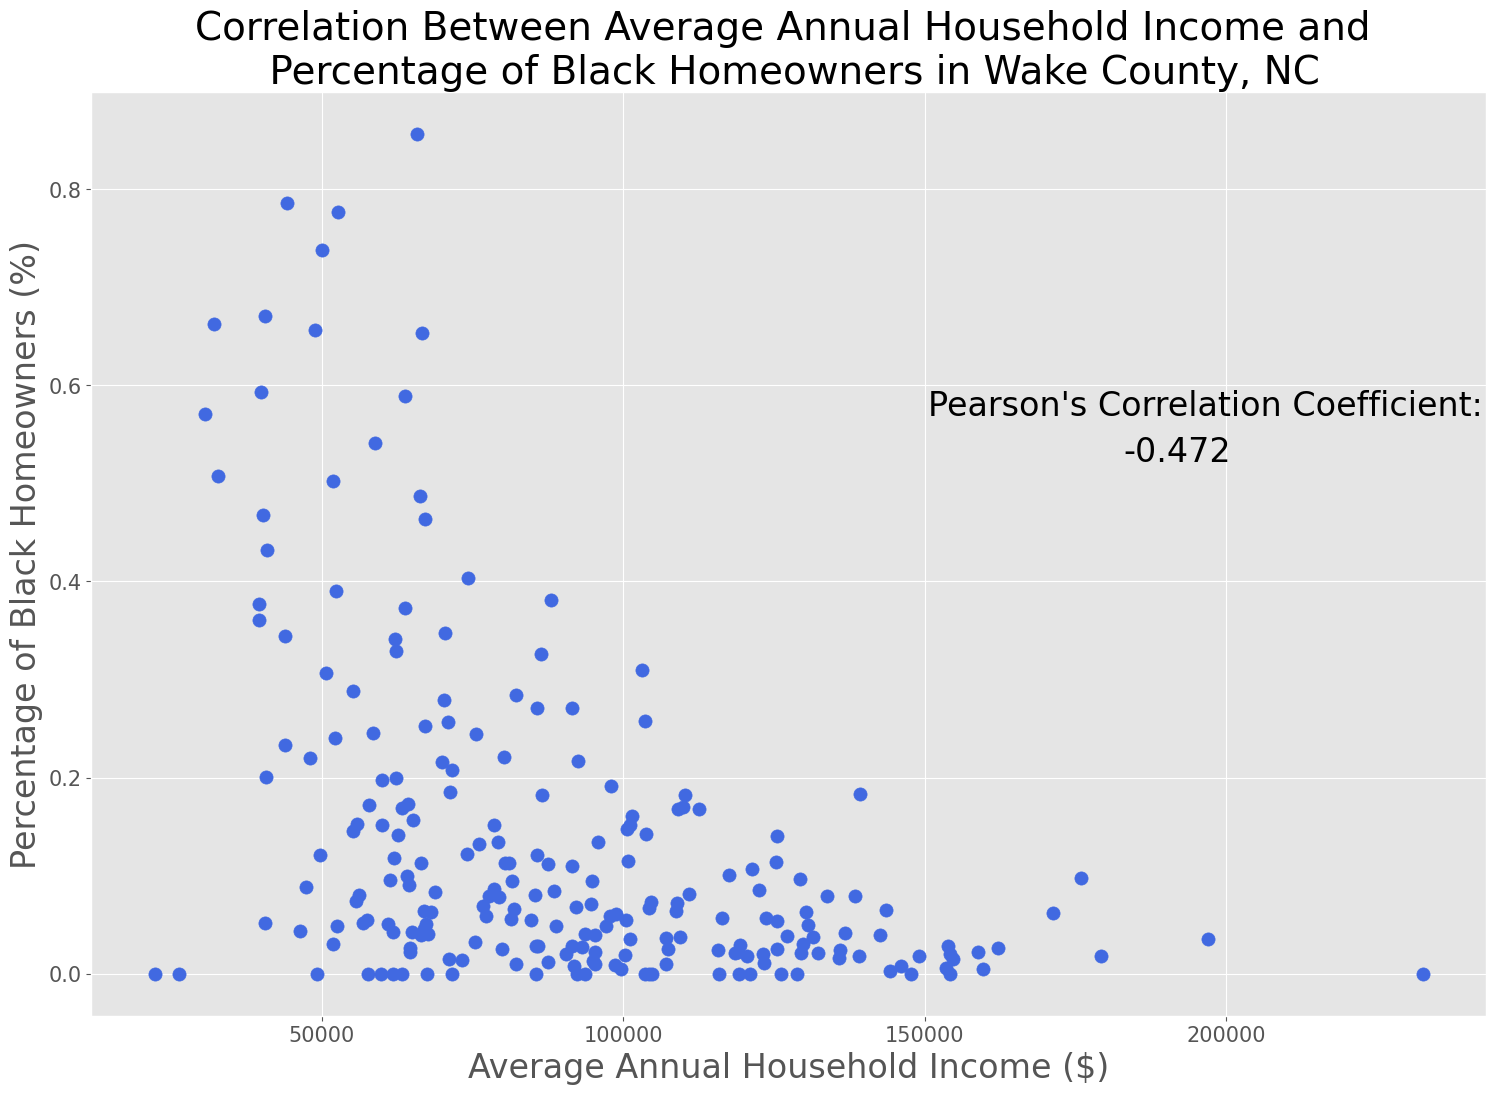

In [186]:
plt.figure(figsize=(18,12))
plt.scatter(totalincome['Tot_Income'], blackhomeownerp['Percent_Black_Homeowners'],
s=90,color='royalblue')
plt.xlabel('Average Annual Household Income ($)',fontsize=24)
plt.ylabel('Percentage of Black Homeowners (%)',fontsize=24)
plt.title('Correlation Between Average Annual Household Income and \n Percentage of Black Homeowners in Wake County, NC',fontsize=28)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.style.use("ggplot")
x0, xmax = plt.xlim()
y0, ymax = plt.ylim()
data_width = xmax - x0
data_height = ymax - y0
plt.text(x0 + data_width * .74, y0 + data_height * 0.6, 
round((corr1),3),size=24)
plt.text(x0 + data_width * .6, y0 + data_height * 0.65, 
"Pearson's Correlation Coefficient:", size=24)

plt.show

In [187]:
wakewdata.to_file("./geojson/wakewdata.geojson",driver="GeoJSON")  

First, we will create an `Options.csv` file and save it in our `csv/` directory. We will create this CSV to look like the **Options** tab in the Google Sheet from the HODV exercise.

![GS_Options](./imgs/gs_options.PNG)

In [188]:
# Create lists for each row we are writing in our csv
header = ['Setting', 'Customize', 'Hints']
info = ['Storymap Info', '', \
    'For help, see tutorial in [HandsOnDataViz.org](https://handsondataviz.org/leaflet-storymaps-with-google-sheets.html)']
title = ['Storymap Title', 'NR491 Final Storymap', '']
subtitle = ['Storymap Subtitle', \
    "Black Homeownership and Income in Wake County<br><small>Scroll down<i class='fafa-chevron-down'></i></small>",\
    "Add your subtitle, or delete that portion"]
logo = ['Storymap Logo', 'media/ncsu_logo.jpg', 'Path to a logo image']
google_analysis = ['Google Analytics Tracking ID', '', 'Sample format: UA-5488840-29']

map_settings = ['Map Settings', '', '']
basemap_tiles = ['Basemap Tiles', 'CartoDB.Positron',\
    '[Drop-down menu for background basemap tiles](https://leaflet-extras.github.io/leaflet-providers/preview/)']
zoom = ['Zoom Controls', 'bottomright', '']
bg_color = ['Narrative Background Color', '', '']
txt_color = ['Narrative Text Color', '', '']
lnk_color = ['Narrative Link Color', '', '']
ch_color = ['Active Chapter Background Color','','']
media_height = ['Media Container Height','300',\
    'Maximum height of the image, in pixels. 200 is default. The image will be fit into the container with its proportions kept (it won\'t be skewed).']
pixels_after_char = ['Pixels After Final Chapter','600','In pixels, at least 100']
lightbox_imgs = ['Enable Lightbox for Images','yes','yes or no']

creds = ['Credits','','']
auth_name = ['Author Name','Add your name','Appears in map credits as "View data by..." (or leave blank)']
auth_email = ['Author Email or Website','','Create link in Author Name by inserting your email or web address (or leave blank)']
auth_GH = ['Author GitHub Repo Link','https://github.com/handsondataviz/leaflet-storymaps-with-google-sheets',\
    'Insert your code repo URL to appear as link in "View code..." (or leave blank)']
code_cred = ['Code Credit','<a href="https://handsondataviz.org">HandsOnDataViz</a>',\
    'Appears in credits as "...code by..." (or leave blank)']

**NOTE:** you can have several different basemap tiles that will appear in the background. 
The options we will look at are:

![Basemaps](./imgs/gs_basemap_tiles.PNG)

We can also choose where on our map we put our zoom controls. The options are:

![zoom](./imgs/gs_zoom.PNG)

Now, we'll write our first CSV.

In [189]:
# Check that the csv directory exists
if not os.path.exists('./csv'):
    os.mkdir('./csv')

# Create a new Options.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Options_Template.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(info)
    writer.writerow(title)
    writer.writerow(subtitle)
    writer.writerow(logo)
    writer.writerow(google_analysis)

    writer.writerow(map_settings)
    writer.writerow(basemap_tiles)
    writer.writerow(zoom)
    writer.writerow(bg_color)
    writer.writerow(txt_color)
    writer.writerow(lnk_color)
    writer.writerow(ch_color)
    writer.writerow(media_height)
    writer.writerow(pixels_after_char)
    writer.writerow(lightbox_imgs)

    writer.writerow(creds)
    writer.writerow(auth_name)
    writer.writerow(auth_email)
    writer.writerow(auth_GH)
    writer.writerow(code_cred)


Now that we've saved our CSV, we will read it in as a Pandas DataFrame and make some edits so it is personalized for us.

**Note:** We could have written our original CSV with all the information we wanted, however now we can practice making edits.

In [190]:
# read in the options csv as a data frame
options_df = pd.read_csv('./csv/Options_Template.csv', index_col=0)
options_df

Customize  \
Setting                                                                              
Storymap Info                                                                  NaN   
Storymap Title                                                NR491 Final Storymap   
Storymap Subtitle                Black Homeownership and Income in Wake County<...   
Storymap Logo                                                  media/ncsu_logo.jpg   
Google Analytics Tracking ID                                                   NaN   
Map Settings                                                                   NaN   
Basemap Tiles                                                     CartoDB.Positron   
Zoom Controls                                                          bottomright   
Narrative Background Color                                                     NaN   
Narrative Text Color                                                           NaN   
Narrative Link Color                                                           NaN   
Active Chapter Background Color                                                NaN   
Media Container Height                                                         300   
Pixels After Final Chapter                                                     600   
Enable Lightbox for Images                                                     yes   
Credits                                                                        NaN   
Author Name                                                          Add your name   
Author Email or Website                                                        NaN   
Author GitHub Repo Link          https://github.com/handsondataviz/leaflet-stor...   
Code Credit                      <a href="https://handsondataviz.org">HandsOnDa...   

                                                                             Hints  
Setting                                                                             
Storymap Info                    For help, see tutorial in [HandsOnDataViz.org]...  
Storymap Title                                                                 NaN  
Storymap Subtitle                        Add your subtitle, or delete that portion  
Storymap Logo                                                 Path to a logo image  
Google Analytics Tracking ID                          Sample format: UA-5488840-29  
Map Settings                                                                   NaN  
Basemap Tiles                    [Drop-down menu for background basemap tiles](...  
Zoom Controls                                                                  NaN  
Narrative Background Color                                                     NaN  
Narrative Text Color                                                           NaN  
Narrative Link Color                                                           NaN  
Active Chapter Background Color                                                NaN  
Media Container Height           Maximum height of the image, in pixels. 200 is...  
Pixels After Final Chapter                                 In pixels, at least 100  
Enable Lightbox for Images                                               yes or no  
Credits                                                                        NaN  
Author Name                      Appears in map credits as "View data by..." (o...  
Author Email or Website          Create link in Author Name by inserting your e...  
Author GitHub Repo Link          Insert your code repo URL to appear as link in...  
Code Credit                      Appears in credits as "...code by..." (or leav...

In [191]:
# we will index to the specific entry we want to edit using df[col][row] indexing.
# we read in the df with the first column as our index to make this easier for ourselves

# here, we are changing the background color of our narative bar
options_df['Customize']['Narrative Background Color'] = 'lightgray'

options_df

Customize  \
Setting                                                                              
Storymap Info                                                                  NaN   
Storymap Title                                                NR491 Final Storymap   
Storymap Subtitle                Black Homeownership and Income in Wake County<...   
Storymap Logo                                                  media/ncsu_logo.jpg   
Google Analytics Tracking ID                                                   NaN   
Map Settings                                                                   NaN   
Basemap Tiles                                                     CartoDB.Positron   
Zoom Controls                                                          bottomright   
Narrative Background Color                                               lightgray   
Narrative Text Color                                                           NaN   
Narrative Link Color                                                           NaN   
Active Chapter Background Color                                                NaN   
Media Container Height                                                         300   
Pixels After Final Chapter                                                     600   
Enable Lightbox for Images                                                     yes   
Credits                                                                        NaN   
Author Name                                                          Add your name   
Author Email or Website                                                        NaN   
Author GitHub Repo Link          https://github.com/handsondataviz/leaflet-stor...   
Code Credit                      <a href="https://handsondataviz.org">HandsOnDa...   

                                                                             Hints  
Setting                                                                             
Storymap Info                    For help, see tutorial in [HandsOnDataViz.org]...  
Storymap Title                                                                 NaN  
Storymap Subtitle                        Add your subtitle, or delete that portion  
Storymap Logo                                                 Path to a logo image  
Google Analytics Tracking ID                          Sample format: UA-5488840-29  
Map Settings                                                                   NaN  
Basemap Tiles                    [Drop-down menu for background basemap tiles](...  
Zoom Controls                                                                  NaN  
Narrative Background Color                                                     NaN  
Narrative Text Color                                                           NaN  
Narrative Link Color                                                           NaN  
Active Chapter Background Color                                                NaN  
Media Container Height           Maximum height of the image, in pixels. 200 is...  
Pixels After Final Chapter                                 In pixels, at least 100  
Enable Lightbox for Images                                               yes or no  
Credits                                                                        NaN  
Author Name                      Appears in map credits as "View data by..." (o...  
Author Email or Website          Create link in Author Name by inserting your e...  
Author GitHub Repo Link          Insert your code repo URL to appear as link in...  
Code Credit                      Appears in credits as "...code by..." (or leav...

In [192]:
options_df['Customize']['Author Name'] = 'Christopher Oates'

options_df

Customize  \
Setting                                                                              
Storymap Info                                                                  NaN   
Storymap Title                                                NR491 Final Storymap   
Storymap Subtitle                Black Homeownership and Income in Wake County<...   
Storymap Logo                                                  media/ncsu_logo.jpg   
Google Analytics Tracking ID                                                   NaN   
Map Settings                                                                   NaN   
Basemap Tiles                                                     CartoDB.Positron   
Zoom Controls                                                          bottomright   
Narrative Background Color                                               lightgray   
Narrative Text Color                                                           NaN   
Narrative Link Color                                                           NaN   
Active Chapter Background Color                                                NaN   
Media Container Height                                                         300   
Pixels After Final Chapter                                                     600   
Enable Lightbox for Images                                                     yes   
Credits                                                                        NaN   
Author Name                                                      Christopher Oates   
Author Email or Website                                                        NaN   
Author GitHub Repo Link          https://github.com/handsondataviz/leaflet-stor...   
Code Credit                      <a href="https://handsondataviz.org">HandsOnDa...   

                                                                             Hints  
Setting                                                                             
Storymap Info                    For help, see tutorial in [HandsOnDataViz.org]...  
Storymap Title                                                                 NaN  
Storymap Subtitle                        Add your subtitle, or delete that portion  
Storymap Logo                                                 Path to a logo image  
Google Analytics Tracking ID                          Sample format: UA-5488840-29  
Map Settings                                                                   NaN  
Basemap Tiles                    [Drop-down menu for background basemap tiles](...  
Zoom Controls                                                                  NaN  
Narrative Background Color                                                     NaN  
Narrative Text Color                                                           NaN  
Narrative Link Color                                                           NaN  
Active Chapter Background Color                                                NaN  
Media Container Height           Maximum height of the image, in pixels. 200 is...  
Pixels After Final Chapter                                 In pixels, at least 100  
Enable Lightbox for Images                                               yes or no  
Credits                                                                        NaN  
Author Name                      Appears in map credits as "View data by..." (o...  
Author Email or Website          Create link in Author Name by inserting your e...  
Author GitHub Repo Link          Insert your code repo URL to appear as link in...  
Code Credit                      Appears in credits as "...code by..." (or leav...

In [193]:
options_df['Customize']['Author GitHub Repo Link'] = 'https://github.com/chrisoates01/nr491-leaflet-storymap'

options_df

Customize  \
Setting                                                                              
Storymap Info                                                                  NaN   
Storymap Title                                                NR491 Final Storymap   
Storymap Subtitle                Black Homeownership and Income in Wake County<...   
Storymap Logo                                                  media/ncsu_logo.jpg   
Google Analytics Tracking ID                                                   NaN   
Map Settings                                                                   NaN   
Basemap Tiles                                                     CartoDB.Positron   
Zoom Controls                                                          bottomright   
Narrative Background Color                                               lightgray   
Narrative Text Color                                                           NaN   
Narrative Link Color                                                           NaN   
Active Chapter Background Color                                                NaN   
Media Container Height                                                         300   
Pixels After Final Chapter                                                     600   
Enable Lightbox for Images                                                     yes   
Credits                                                                        NaN   
Author Name                                                      Christopher Oates   
Author Email or Website                                                        NaN   
Author GitHub Repo Link          https://github.com/chrisoates01/nr491-leaflet-...   
Code Credit                      <a href="https://handsondataviz.org">HandsOnDa...   

                                                                             Hints  
Setting                                                                             
Storymap Info                    For help, see tutorial in [HandsOnDataViz.org]...  
Storymap Title                                                                 NaN  
Storymap Subtitle                        Add your subtitle, or delete that portion  
Storymap Logo                                                 Path to a logo image  
Google Analytics Tracking ID                          Sample format: UA-5488840-29  
Map Settings                                                                   NaN  
Basemap Tiles                    [Drop-down menu for background basemap tiles](...  
Zoom Controls                                                                  NaN  
Narrative Background Color                                                     NaN  
Narrative Text Color                                                           NaN  
Narrative Link Color                                                           NaN  
Active Chapter Background Color                                                NaN  
Media Container Height           Maximum height of the image, in pixels. 200 is...  
Pixels After Final Chapter                                 In pixels, at least 100  
Enable Lightbox for Images                                               yes or no  
Credits                                                                        NaN  
Author Name                      Appears in map credits as "View data by..." (o...  
Author Email or Website          Create link in Author Name by inserting your e...  
Author GitHub Repo Link          Insert your code repo URL to appear as link in...  
Code Credit                      Appears in credits as "...code by..." (or leav...

In [194]:
options_df.to_csv('./csv/Options.csv')

Now let's checkout what our index.html file looks like so far.

### Chapters

We will add content to our map by creating a `Chapters.csv`.

However, first we will look through our data to get the information we are interested in.

Now, let's read in some of our spatial data.

In [195]:
# Filepaths
nc_colleges_path = './data1/Colleges_and_Universities/Colleges_and_Universities.shp'
nc_amtrak_stations_path = './data1/Amtrak_Stations_Trains_Reproj_NC/Amtrak_Stations_Trains_Reproj_NC.shp'

# Read data
nc_colleges = gpd.read_file(nc_colleges_path)
nc_amtrak_stations = gpd.read_file(nc_amtrak_stations_path)

# Print CRS
print(nc_colleges.crs)
print(nc_amtrak_stations.crs)


epsg:32119
epsg:4269


In [196]:
# Reproject to WGS84
nc_colleges_wgs84 = nc_colleges.to_crs(epsg=4326)
nc_amtrak_stations_wgs84 = nc_amtrak_stations.to_crs(epsg=4326)

# Create a Geo-id which is needed by the Folium (it needs to have a unique identifier for each row)
nc_colleges_wgs84['geoid'] = nc_colleges_wgs84.index.astype(str)
nc_amtrak_stations_wgs84['geoid'] = nc_amtrak_stations_wgs84.index.astype(str)

We can use the `folium` package to see what our Leaflet map will look like.

In [197]:
# Create a Map instance centered on Raleigh
m = folium.Map(location=[35.7796, -78.6382], zoom_start=11, control_scale=True)
m

In [198]:
# Show the colleges on the map

# Create college points on top of the map
for idx, row in nc_colleges_wgs84.iterrows():
    # Get lat and lon of points
    lon = row['geometry'].x
    lat = row['geometry'].y

    # Get college information
    college_name = row['NAME']

    #Add markers to the map
    folium.Marker([lat,lon], popup=college_name).add_to(m)

m

Let's parse this data down to schools in Raleigh, and remove some of the information we are not interested in.

In [199]:
wakewdata.head()

OBJECTID STATEFP COUNTYFP TRACTCE      GEOID_x  NAME_x  \
0         1      37      183  052704  37183052704  527.04   
1         2      37      183  053432  37183053432  534.32   
2         3      37      183  053435  37183053435  534.35   
3         4      37      183  054224  37183054224  542.24   
4         5      37      183  054223  37183054223  542.23   

              NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  Tblack BOwner Brenter  \
0  Census Tract 527.04  G5020        S   2922352  ...    1260    264     996   
1  Census Tract 534.32  G5020        S  17659472  ...     113    109       4   
2  Census Tract 534.35  G5020        S   3026312  ...       0      0       0   
3  Census Tract 542.24  G5020        S   4097266  ...     470    179     291   
4  Census Tract 542.23  G5020        S   3765544  ...     229    135      94   

        GISJOIN_y     YEAR_y   NAME_y Tot_Income     Owner   Renter  \
0  G3701830052704  2016-2020  527.04     40926.0   60060.0  36039.0   
1  G3701830053432  2016-2020  534.32    100676.0  101098.0      NaN   
2  G3701830053435  2016-2020  534.35    103610.0  136648.0  93949.0   
3  G3701830054224  2016-2020  542.24     57784.0   75066.0  36776.0   
4  G3701830054223  2016-2020  542.23     48125.0  109113.0  45625.0   

  Percent_Black_Homeowners  
0                 0.432079  
1                 0.147497  
2                 0.000000  
3                 0.172447  
4                 0.219870  

[5 rows x 52 columns]

In [200]:
nc_coll_raleigh = nc_colleges_wgs84[nc_colleges_wgs84['CITY'] == 'RALEIGH'].drop(['OBJECTID', \
    'METLNKID', 'PHONE', 'SECCLASS', 'ST_VENDOR', 'ST_VERSION', 'ADDRESS2', 'EMERGTITLE', 'EMERGPHONE',
    'EMERGEXT', 'DIRECTIONS', 'CONTDATE', 'CONTHOW', 'GEOPREC', 'QC_QA', 'onemapSDEA', \
    'GEOHOW', 'GEOLINKID', 'GEODATE', 'PHONELOC'], axis=1)
nc_coll_raleigh

ID FEATTYPE                                        NAME  \
0   10275649    POINT                SCHOOL OF COMMUNICATION ARTS   
19  10274284    POINT            WAKE TECHNICAL COMMUNITY COLLEGE   
22  10274261    POINT                               PEACE COLLEGE   
32  10272064    POINT                             SHAW UNIVERSITY   
49  10275987    POINT        UNIVERSITY OF PHOENIX-RALEIGH CAMPUS   
57  10274245    POINT                            MEREDITH COLLEGE   
65  10272187    POINT                    SAINT AUGUSTINES COLLEGE   
97  10274257    POINT  NORTH CAROLINA STATE UNIVERSITY AT RALEIGH   

                               ADDRESS     CITY STATE    ZIP ZIPP4 COUNTY  \
0        3000 WAKEFIELD CROSSING DRIVE  RALEIGH    NC  27614  None   WAKE   
19              9101 FAYETTEVILLE ROAD  RALEIGH    NC  27603  5655   WAKE   
22                       15 E PEACE ST  RALEIGH    NC  27604  1176   WAKE   
32                      118 E SOUTH ST  RALEIGH    NC  27601  2341   WAKE   
49  5511 CAPITAL CENTER DRIVE STE. 380  RALEIGH    NC  27606  4168   WAKE   
57                3800 HILLSBOROUGH ST  RALEIGH    NC  27607  5237   WAKE   
65                 1315 OAKWOOD AVENUE  RALEIGH    NC  27610  2247   WAKE   
97            2200 HILLSBOROUGH STREET  RALEIGH    NC  27695  0001   WAKE   

     FIPS NAICSCODE                           NAICSDESCR          X  \
0   37183    611610  FINE ARTS SCHOOLS (EXCEPT ACADEMIC) -78.556242   
19  37183     61151          TECHNICAL AND TRADE SCHOOLS -78.706852   
22  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.637376   
32  37183    611310                         UNIVERSITIES -78.637986   
49  37183    611310                         UNIVERSITIES -78.729081   
57  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.688041   
65  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.620682   
97  37183    611310                         UNIVERSITIES -78.664483   

            Y              DEGREE  ENROLL                    geometry geoid  
0   35.942785  ASSOCIATE'S DEGREE     298  POINT (-78.55624 35.94278)     0  
19  35.650636  ASSOCIATE'S DEGREE   11832  POINT (-78.70685 35.65063)    19  
22  35.788240   BACHELOR'S DEGREE     668  POINT (-78.63737 35.78824)    22  
32  35.771817     MASTER'S DEGREE    2762  POINT (-78.63798 35.77182)    32  
49  35.767244     MASTER'S DEGREE     221  POINT (-78.72908 35.76724)    49  
57  35.794525     MASTER'S DEGREE    2168  POINT (-78.68804 35.79452)    57  
65  35.784495   BACHELOR'S DEGREE    1163  POINT (-78.62068 35.78449)    65  
97  35.786472     DOCTOR'S DEGREE   30148  POINT (-78.66448 35.78647)    97

We will build our storymap with each of these schools as a chapter.

Now, let's make our `Chapters.csv` with specific column headers (**do not change the headers, they work with the background Leaflet code**) and a row for each of our chapters.

In [201]:
header = ['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link', 'Description', \
    'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude', 'Longitude', 'Overlay', 'Overlay Transparency', \
    'GeoJSON Overlay', 'GeoJSON Feature Properties']

# add a column of founding date to our nc_coll_raleigh df

In [202]:
nc_coll_raleigh.loc[[22], ['FOUNDED']] = 1857 # Peace College
nc_coll_raleigh.loc[[32], ['FOUNDED']] = 1865 # Shaw University
nc_coll_raleigh.loc[[65], ['FOUNDED']] = 1867 # St. Augustune's University
nc_coll_raleigh.loc[[97], ['FOUNDED']] = 1887 # NC State University
nc_coll_raleigh.loc[[57], ['FOUNDED']] = 1891 # Meredith College
nc_coll_raleigh.loc[[19], ['FOUNDED']] = 1963 # Wake Tech
nc_coll_raleigh.loc[[49], ['FOUNDED']] = 1976 # University of Phoenix
nc_coll_raleigh.loc[[0], ['FOUNDED']] = 1992 # School of communication arts

nc_coll_raleigh = nc_coll_raleigh.sort_values(by='FOUNDED')
nc_coll_raleigh

ID FEATTYPE                                        NAME  \
22  10274261    POINT                               PEACE COLLEGE   
32  10272064    POINT                             SHAW UNIVERSITY   
65  10272187    POINT                    SAINT AUGUSTINES COLLEGE   
97  10274257    POINT  NORTH CAROLINA STATE UNIVERSITY AT RALEIGH   
57  10274245    POINT                            MEREDITH COLLEGE   
19  10274284    POINT            WAKE TECHNICAL COMMUNITY COLLEGE   
49  10275987    POINT        UNIVERSITY OF PHOENIX-RALEIGH CAMPUS   
0   10275649    POINT                SCHOOL OF COMMUNICATION ARTS   

                               ADDRESS     CITY STATE    ZIP ZIPP4 COUNTY  \
22                       15 E PEACE ST  RALEIGH    NC  27604  1176   WAKE   
32                      118 E SOUTH ST  RALEIGH    NC  27601  2341   WAKE   
65                 1315 OAKWOOD AVENUE  RALEIGH    NC  27610  2247   WAKE   
97            2200 HILLSBOROUGH STREET  RALEIGH    NC  27695  0001   WAKE   
57                3800 HILLSBOROUGH ST  RALEIGH    NC  27607  5237   WAKE   
19              9101 FAYETTEVILLE ROAD  RALEIGH    NC  27603  5655   WAKE   
49  5511 CAPITAL CENTER DRIVE STE. 380  RALEIGH    NC  27606  4168   WAKE   
0        3000 WAKEFIELD CROSSING DRIVE  RALEIGH    NC  27614  None   WAKE   

     FIPS NAICSCODE                           NAICSDESCR          X  \
22  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.637376   
32  37183    611310                         UNIVERSITIES -78.637986   
65  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.620682   
97  37183    611310                         UNIVERSITIES -78.664483   
57  37183    611310    COLLEGES (EXCEPT JUNIOR COLLEGES) -78.688041   
19  37183     61151          TECHNICAL AND TRADE SCHOOLS -78.706852   
49  37183    611310                         UNIVERSITIES -78.729081   
0   37183    611610  FINE ARTS SCHOOLS (EXCEPT ACADEMIC) -78.556242   

            Y              DEGREE  ENROLL                    geometry geoid  \
22  35.788240   BACHELOR'S DEGREE     668  POINT (-78.63737 35.78824)    22   
32  35.771817     MASTER'S DEGREE    2762  POINT (-78.63798 35.77182)    32   
65  35.784495   BACHELOR'S DEGREE    1163  POINT (-78.62068 35.78449)    65   
97  35.786472     DOCTOR'S DEGREE   30148  POINT (-78.66448 35.78647)    97   
57  35.794525     MASTER'S DEGREE    2168  POINT (-78.68804 35.79452)    57   
19  35.650636  ASSOCIATE'S DEGREE   11832  POINT (-78.70685 35.65063)    19   
49  35.767244     MASTER'S DEGREE     221  POINT (-78.72908 35.76724)    49   
0   35.942785  ASSOCIATE'S DEGREE     298  POINT (-78.55624 35.94278)     0   

    FOUNDED  
22   1857.0  
32   1865.0  
65   1867.0  
97   1887.0  
57   1891.0  
19   1963.0  
49   1976.0  
0    1992.0

In [203]:
wakewdata.head()

OBJECTID STATEFP COUNTYFP TRACTCE      GEOID_x  NAME_x  \
0         1      37      183  052704  37183052704  527.04   
1         2      37      183  053432  37183053432  534.32   
2         3      37      183  053435  37183053435  534.35   
3         4      37      183  054224  37183054224  542.24   
4         5      37      183  054223  37183054223  542.23   

              NAMELSAD  MTFCC FUNCSTAT     ALAND  ...  Tblack BOwner Brenter  \
0  Census Tract 527.04  G5020        S   2922352  ...    1260    264     996   
1  Census Tract 534.32  G5020        S  17659472  ...     113    109       4   
2  Census Tract 534.35  G5020        S   3026312  ...       0      0       0   
3  Census Tract 542.24  G5020        S   4097266  ...     470    179     291   
4  Census Tract 542.23  G5020        S   3765544  ...     229    135      94   

        GISJOIN_y     YEAR_y   NAME_y Tot_Income     Owner   Renter  \
0  G3701830052704  2016-2020  527.04     40926.0   60060.0  36039.0   
1  G3701830053432  2016-2020  534.32    100676.0  101098.0      NaN   
2  G3701830053435  2016-2020  534.35    103610.0  136648.0  93949.0   
3  G3701830054224  2016-2020  542.24     57784.0   75066.0  36776.0   
4  G3701830054223  2016-2020  542.23     48125.0  109113.0  45625.0   

  Percent_Black_Homeowners  
0                 0.432079  
1                 0.147497  
2                 0.000000  
3                 0.172447  
4                 0.219870  

[5 rows x 52 columns]

In [204]:
wakewdata.columns

Index(['OBJECTID', 'STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID_x', 'NAME_x',
       'NAMELSAD', 'MTFCC', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT',
       'INTPTLON', 'OID', 'SUMLEV', 'GEOVAR', 'GEOID_1', 'GEOCODE', 'STATE',
       'COUNTY', 'TRACT', 'NAME_1', 'POPULATION', 'HOUSING_UN', 'OCCUPIED_U',
       'VACANT_UNI', 'GROUP_QUAR', 'OCCUPANCY_', 'VACANCY_RA', 'Shape__Are',
       'Shape__Len', 'geometry', 'GISJOIN_x', 'YEAR_x', 'GEOID_y', 'GEOIDTX11',
       'Total', 'Towner', 'Trenter', 'TWhite', 'Wowner', 'Wrenter', 'Tblack',
       'BOwner', 'Brenter', 'GISJOIN_y', 'YEAR_y', 'NAME_y', 'Tot_Income',
       'Owner', 'Renter', 'Percent_Black_Homeowners'],
      dtype='object')

In [205]:
col_names=["Ways to Improve City Building", "Black Homeownership in Wake County","Annual Income Distribution in Wake County","Correlation Between Annual Income and Black Homeownership in Wake County","Annual Income Homeownership and Urbanization in Wake County","Black Homeownership and Urbanization in Wake County","Discussion"]

In [206]:
# Create a new Chapters.csv

# opens a csv file in write mode
# the wuth statement makes sure the file closes properly when we're done
with open('./csv/Chapters.csv', 'w', newline='') as options:
    # create the csv writer
    writer = csv.writer(options)

    # write a row to the csv file
    writer.writerow(header)

    writer.writerow(['The Effects of Urbanization in Wake County'])

    for name in col_names:
        writer.writerow([name])

In [207]:
chapter_df = pd.read_csv('./csv/Chapters.csv')
chapter_df

Chapter  Media Link  \
0         The Effects of Urbanization in Wake County         NaN   
1                      Ways to Improve City Building         NaN   
2                 Black Homeownership in Wake County         NaN   
3          Annual Income Distribution in Wake County         NaN   
4  Correlation Between Annual Income and Black Ho...         NaN   
5  Annual Income Homeownership and Urbanization i...         NaN   
6  Black Homeownership and Urbanization in Wake C...         NaN   
7                                         Discussion         NaN   

   Media Credit  Media Credit Link  Description  Zoom  Marker  Marker Color  \
0           NaN                NaN          NaN   NaN     NaN           NaN   
1           NaN                NaN          NaN   NaN     NaN           NaN   
2           NaN                NaN          NaN   NaN     NaN           NaN   
3           NaN                NaN          NaN   NaN     NaN           NaN   
4           NaN                NaN          NaN   NaN     NaN           NaN   
5           NaN                NaN          NaN   NaN     NaN           NaN   
6           NaN                NaN          NaN   NaN     NaN           NaN   
7           NaN                NaN          NaN   NaN     NaN           NaN   

   Location  Latitude  Longitude  Overlay  Overlay Transparency  \
0       NaN       NaN        NaN      NaN                   NaN   
1       NaN       NaN        NaN      NaN                   NaN   
2       NaN       NaN        NaN      NaN                   NaN   
3       NaN       NaN        NaN      NaN                   NaN   
4       NaN       NaN        NaN      NaN                   NaN   
5       NaN       NaN        NaN      NaN                   NaN   
6       NaN       NaN        NaN      NaN                   NaN   
7       NaN       NaN        NaN      NaN                   NaN   

   GeoJSON Overlay  GeoJSON Feature Properties  
0              NaN                         NaN  
1              NaN                         NaN  
2              NaN                         NaN  
3              NaN                         NaN  
4              NaN                         NaN  
5              NaN                         NaN  
6              NaN                         NaN  
7              NaN                         NaN

Our first chapter will give a brief overview of Raleigh. We will include a fun skyline image with a link to where we got the image (the Raleigh government webpage). Our map will show a historical, georeferenced map of the Raleigh City Plan from 1834 along with blue markers for each of the 8 schools we will look at for chapters.

To include images in our narative, we need to have them downloaded to our `media` directory.

In [208]:
chapter_df.columns

Index(['Chapter', 'Media Link', 'Media Credit', 'Media Credit Link',
       'Description', 'Zoom', 'Marker', 'Marker Color', 'Location', 'Latitude',
       'Longitude', 'Overlay', 'Overlay Transparency', 'GeoJSON Overlay',
       'GeoJSON Feature Properties'],
      dtype='object')

In [209]:
wakewdata.to_file("./geojson/wakewdata.geojson",driver="GeoJSON")  

In [210]:
# path to the image used for this chapter
chapter_df.loc[[0], ['Media Link']] = 'media/nlcd.jpg'
# Name of image source
chapter_df.loc[[0], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[0], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[0], ['Description']] = '<p>Wake County is one of the fastest-growing regions in the United States. Estimates say that about 56 people move to Wake County each day. Technological, educational, and industrial benefits all are huge draws for the area.</p><p>The drawbacks of such rapid growth are effects that it has on people who are less affluent than the people who are moving into the county for work. Many people who have lived their entire lives in Wake County are being driven out of larger urban hubs like Raleigh and Cary because they can no longer afford to live in their homes.They are being forced to move farther into the outer portions of the county (and in some cases, into neighboring counties like Harnett and Johnston).</p>'
# Zoom level
chapter_df.loc[[0], ['Zoom']] = 10
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[0], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[0], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[0], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[0], ['Latitude']] = 35.7796
chapter_df.loc[[0], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[0], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[0], ['Overlay Transparency']] = 1
chapter_df.loc[[0], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[0], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"



In [211]:
# path to the image used for this chapter
chapter_df.loc[[1], ['Media Link']] = 'https://www.youtube.com/embed/IFjD3NMv6Kw'
# Name of image source
chapter_df.loc[[1], ['Media Credit']] = 'TEDTalks '
# Link to image
chapter_df.loc[[1], ['Media Credit Link']] = 'http://www.ted.com'
# Narrative description
chapter_df.loc[[1], ['Description']] = "More than half of the world's population already lives in cities, and another 2.5 billion people are projected to move to urban areas by 2050. The way we build new cities will be at the heart of so much that matters, from climate change to economic vitality to our very well-being and sense of connectedness. Peter Calthorpe is already at work planning the cities of the future and advocating for community design that's focused on human interaction. He shares seven universal principles for solving sprawl and building smarter, more sustainable cities."
# Zoom level
chapter_df.loc[[1], ['Zoom']] = 15
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[1], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[1], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[1], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[1], ['Latitude']] = 35.7796
chapter_df.loc[[1], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[1], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[1], ['Overlay Transparency']] = 1
chapter_df.loc[[1], ['GeoJSON Overlay']] = ""

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[1], ['GeoJSON Feature Properties']] = " "

In [212]:
# path to the image used for this chapter
chapter_df.loc[[2], ['Media Link']] = "media/Percent of Black Homeowners in Wake County, NC.png"
# Name of image source
chapter_df.loc[[2], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[2], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[2], ['Description']] = '<p>While homeownership numbers are important data points to have, sums can oftentimes tell incomplete stories. To combat this, I decided to calculate the percentage of Black homeowners. This was accomplished by dividing the total number of Black homeowners by the total number of homeowners in a particular tract.</p><p>Eastern Wake County (Southeast Raleigh especially) has some of the largest percentages of Black homeowners per census tract in the entire county. </p>'
# Zoom level
chapter_df.loc[[2], ['Zoom']] = 10.5
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[2], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[2], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[2], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[2], ['Latitude']] = 35.7796
chapter_df.loc[[2], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[2], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[2], ['Overlay Transparency']] = 1
chapter_df.loc[[2], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[2], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"

In [213]:
# path to the image used for this chapter
chapter_df.loc[[3], ['Media Link']] = "media/Average Annual Household Income Distribution in Wake County, NC.png"
# Name of image source
chapter_df.loc[[3], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[3], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[3], ['Description']] = '<p>That same area (Southeast Raleigh) also appeared to be the least affluent area of Wake County. However, visual inspections and interpretations can be misleading. It isn’t possible to tell the exact classification of each of color on the scale, so one can only make generalizations about homeownership and income. </p><p>Further analysis was needed to determine any potential correlation between the two variables. </p>'
# Zoom level
chapter_df.loc[[3], ['Zoom']] = 10.5
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[3], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[3], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[3], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[3], ['Latitude']] = 35.7796
chapter_df.loc[[3], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[3], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[3], ['Overlay Transparency']] = 1
chapter_df.loc[[3], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[3], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"

In [214]:
# path to the image used for this chapter
chapter_df.loc[[4], ['Media Link']] = 'media/Correlation Between Average Annual Household Income and Percentage of Black Homeowners in Wake County, NC.png'
# Name of image source
chapter_df.loc[[4], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[4], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[4], ['Description']] = "<p>I decided to use thr Pearson correlation coefficient to determine if there was any relation between annual household income and the percentage of Black homeowners.</p><p>The calculated Pearson correlation coefficient came out to be negative 0.476. This means that (generally) as the average annual household income increases, the percentage of Black homeowners decreases. Negative 0.476 means there is a moderate negative correlation. </p>"
# Zoom level
chapter_df.loc[[4], ['Zoom']] = 10
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[4], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[4], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[4], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[4], ['Latitude']] = 35.7796
chapter_df.loc[[4], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[4], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[4], ['Overlay Transparency']] = 1
chapter_df.loc[[4], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[4], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"

In [215]:
# path to the image used for this chapter
chapter_df.loc[[5], ['Media Link']] = 'media/income and urbanization.jpg'
# Name of image source
chapter_df.loc[[5], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[5], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[5], ['Description']] = '<p>Urbanization is another factor that is closely associated with homeownership. As more land and space are converted into commercial zones, the price and demand for the remaining residential zones increase. When space is at such a premium, the price of residential land and homes becomes so high that only a select few people can afford to live in those areas. </p><p>This causes many people to have to move out of their communities or pay incredibly high rent prices just to stay in their own towns and neighborhoods.</p><p>Urbanization and urban sprawl are commonplace all across Wake County. Cities like Raleigh and Durham (parts of Durham extend into Wake County) need to have serious conversations surrounding housing and zoning policies. </p><p>To see if urbanization is affecting Wake County residents, I decided to map NLCD data alongside the income and homeownership data. </p>'
# Zoom level
chapter_df.loc[[5], ['Zoom']] = 10.5
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[5], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[5], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[5], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[5], ['Latitude']] = 35.7796
chapter_df.loc[[5], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[5], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[5], ['Overlay Transparency']] = 1
chapter_df.loc[[5], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[5], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"

In [216]:
# path to the image used for this chapter
chapter_df.loc[[6], ['Media Link']] = 'media/homeownership and urbanization.jpg'
# Name of image source
chapter_df.loc[[6], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[6], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[6], ['Description']] = '<p>Urbanization is another factor that is closely associated with homeownership. As more land and space are converted into commercial zones, the price and demand for the remaining residential zones increase. When space is at such a premium, the price of residential land and homes becomes so high that only a select few people can afford to live in those areas. </p><p>This causes many people to have to move out of their communities or pay incredibly high rent prices just to stay in their own towns and neighborhoods.</p><p>Urbanization and urban sprawl are commonplace all across Wake County. Cities like Raleigh and Durham (parts of Durham extend into Wake County) need to have serious conversations surrounding housing and zoning policies. </p><p>To see if urbanization is affecting Wake County residents, I decided to map NLCD data alongside the income and homeownership data. </p>'
# Zoom level
chapter_df.loc[[6], ['Zoom']] = 10.5
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[6], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[6], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[6], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[6], ['Latitude']] = 35.7796
chapter_df.loc[[6], ['Longitude']] = -78.6382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[6], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[6], ['Overlay Transparency']] = 1
chapter_df.loc[[6], ['GeoJSON Overlay']] = "geojson/wakewdata.geojson"

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[6], ['GeoJSON Feature Properties']] = "fillColor:red;color:black"

In [217]:
# path to the image used for this chapter
chapter_df.loc[[7], ['Media Link']] = 'media/homeownership and urbanization.jpg'
# Name of image source
chapter_df.loc[[7], ['Media Credit']] = ' '
# Link to image
chapter_df.loc[[7], ['Media Credit Link']] = ' '
# Narrative description
chapter_df.loc[[7], ['Description']] = '<p>After examining the two previous maps, I believe that is clear that areas of high development and urbanization are also areas that have very little Black homeownership. The highest concentration of Black homeowners is located outside of city centers; away from many people’s jobs.</p><p>Income is also unevenly distributed throughout the county. Many of the areas that are far from the city centers have higher percentages of Black homeowners, and those same communities are less affluent. This uneven distribution of wealth means those locations will likely become the targets of urbanization efforts and urban sprawl in the future.</p><p>Problems surrounding homeownership, income distribution, zoning, and urbanization are very prevalent in Wake County. I believe that as students and residents in Wake County it is important to stay informed and aware of said issues.</p><p>Although we might not have all of the answers and means to facilitate necessary change in these areas, using our skills and knowledge to inform and provide others with insight still goes a long way in advancing towards the goal of a more equitable and just society. </p>'
# Zoom level
chapter_df.loc[[7], ['Zoom']] = 10
# Markers can be Hidden, Plain, or Numbered
chapter_df.loc[[7], ['Marker']] = 'Hidden'
# if the marker is not Hidden, you can give it a color
chapter_df.loc[[7], ['Marker Color']] = ''
# name of the location
chapter_df.loc[[7], ['Location']] = 'Raleigh, NC'
chapter_df.loc[[7], ['Latitude']] = 35.7797
chapter_df.loc[[7], ['Longitude']] = -78.7382
# If you want to add an overlay of an old map you can search for a georeferenced map at
# mapwraper.net
# add the link to the map in the Overlay section 
chapter_df.loc[[7], ['Overlay']] = ''
# Set how transparent you want the Overlay image/map to be
chapter_df.loc[[7], ['Overlay Transparency']] = 1
chapter_df.loc[[7], ['GeoJSON Overlay']] = " "

# We can also set different parameters for the GeoJSON
# These parameters are: fillColor, weight, opacity, color, and fillOpacity
chapter_df.loc[[7], ['GeoJSON Feature Properties']] = " "

In [218]:
chapter_df

Chapter  \
0         The Effects of Urbanization in Wake County   
1                      Ways to Improve City Building   
2                 Black Homeownership in Wake County   
3          Annual Income Distribution in Wake County   
4  Correlation Between Annual Income and Black Ho...   
5  Annual Income Homeownership and Urbanization i...   
6  Black Homeownership and Urbanization in Wake C...   
7                                         Discussion   

                                          Media Link Media Credit  \
0                                     media/nlcd.jpg                
1          https://www.youtube.com/embed/IFjD3NMv6Kw    TEDTalks    
2  media/Percent of Black Homeowners in Wake Coun...                
3  media/Average Annual Household Income Distribu...                
4  media/Correlation Between Average Annual House...                
5                  media/income and urbanization.jpg                
6           media/homeownership and urbanization.jpg                
7           media/homeownership and urbanization.jpg                

    Media Credit Link                                        Description  \
0                      <p>Wake County is one of the fastest-growing r...   
1  http://www.ted.com  More than half of the world's population alrea...   
2                      <p>While homeownership numbers are important d...   
3                      <p>That same area (Southeast Raleigh) also app...   
4                      <p>I decided to use thr Pearson correlation co...   
5                      <p>Urbanization is another factor that is clos...   
6                      <p>Urbanization is another factor that is clos...   
7                      <p>After examining the two previous maps, I be...   

   Zoom  Marker Marker Color     Location  Latitude  Longitude Overlay  \
0  10.0  Hidden               Raleigh, NC   35.7796   -78.6382           
1  15.0  Hidden               Raleigh, NC   35.7796   -78.6382           
2  10.5  Hidden               Raleigh, NC   35.7796   -78.6382           
3  10.5  Hidden               Raleigh, NC   35.7796   -78.6382           
4  10.0  Hidden               Raleigh, NC   35.7796   -78.6382           
5  10.5  Hidden               Raleigh, NC   35.7796   -78.6382           
6  10.5  Hidden               Raleigh, NC   35.7796   -78.6382           
7  10.0  Hidden               Raleigh, NC   35.7797   -78.7382           

   Overlay Transparency            GeoJSON Overlay GeoJSON Feature Properties  
0                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
1                   1.0                                                        
2                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
3                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
4                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
5                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
6                   1.0  geojson/wakewdata.geojson  fillColor:red;color:black  
7                   1.0

Now, let's save this to a CSV and see how this changes our storymap.

In [219]:
chapter_df.to_csv('./csv/Chapters.csv')

We have a map! We also have some images, links, and narrative text appearing.

Now, let's add a new image and image source information for Peace College.

Next, we'll look at adding a video to our narrative bar.

In order to add a YouTube video to our storymap, we need to first find a YouTube video we want to add. For this example, let's follow [this link](https://www.youtube.com/watch?v=aZQFQnbs_Ho) to a fan-made hype video of the NC State Football Team.

Next, click the `Share` button at the bottom right of the video and then click `Embed`. Next, **only** copy the link that appears after `src="`. We will use that in our next code chunk.

<!-- Link that should be copied: https://www.youtube.com/embed/aZQFQnbs_Ho" -->

Let's look at our `index.html` again. What has changed? Does it look the way you expect?

### Overlay GeoJSON

Next, we'll add a GeoJSON file to our map. Leaflet uses GeoJSONs instead of Shapefiles. If you mostly use Shapefiles, just open them into QGIS and save them as GeoJSONs to get them ready for the storymap.

All of our GeoJSONs need be saved in the `geojson` folder.

**Important:** Your GeoJSON files **MUST** be in a recognized projection and have a `"crs"` attribute. *It will be easiest for you if they are all in the same CRS.*

Let's add our GeoJSON of NC State's campuses.

To change a specific campus color, we will need to edit the GeoJSON itself.

*NOTE: I am working on integrating another set of Leaflet code so that you will not have to manually edit the GeoJSON files, but it's not ready yet.*

To edit the GeoJSON file, open it with a text-editor (like Notepad) or in VS Code. Use `ctrl+f` to find `"properties"`. GeoJSON files are essentially full of dictionaries. After the `"Precinct_N"` key:value pair, add `"fillColor": "blue",` and save your changes.

Refresh your `index.html`. Do you see any changes? (Note: it can take a while for changes to be fully processed. Make sure everything is saved.)

Now, let's add another historic map of Raleigh. Go to https://mapwarper.net/ and put "raleigh" in the search bar. Select "Rectified maps only" and search. 

Look through the maps and find one you want to use. Click on the "Export" tab at the top and copy the link from the "Tiles (Google/OSM scheme):" option.

<!-- https://mapwarper.net/maps/tile/44859/{z}/{x}/{y}.png -->

Try adding new images, text, vidoes, and GeoJSON files to different chapters. 
Remember to add the data we are adding to their respective folders.